# Visualization

In [ ]:
# def longest_common_prefix(strs):
#     if not strs:
#         return ""

#     prefix = strs[0]
#     for string in strs[1:]:
#         i = 0
#         while i < len(prefix) and i < len(string) and prefix[i] == string[i]:
#             i += 1
#         prefix = prefix[:i]

#     return prefix

# # Test cases
# print(longest_common_prefix(["flower", "flow", "flight"]))  # Output: "fl"
# print(longest_common_prefix(["dog", "racecar", "car"]))      # Output: ""
# print(longest_common_prefix(["apple", "apricot", "apology"]))  # Output: "ap"

## IMPORT LIBRALY

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import re

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS
# ImageColorGenerator
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

from collections import defaultdict,Counter
import plotly.express as px

from sklearn.metrics import f1_score, make_scorer, hamming_loss, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

<ipython-input-55-03c0206748b2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Statistics

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/Corona_NLP_train.csv",encoding='latin1')
df_test = pd.read_csv("/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/Corona_NLP_test.csv",encoding='latin1')

In [ ]:
df = pd.concat([df_train,df_test])
df

UserName  ScreenName             Location     TweetAt  \
0         3799       48751               London  16-03-2020   
1         3800       48752                   UK  16-03-2020   
2         3801       48753            Vagabonds  16-03-2020   
3         3802       48754                  NaN  16-03-2020   
4         3803       48755                  NaN  16-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1     advice Talk to your neighbours family to excha...            Positive  
2     Coronavirus Australia: Woolworths to give elde...            Positive  
3     My food stock is not the only one which is emp...            Positive  
4     Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                 ...                 ...  
3793  Meanwhile In A Supermarket in Israel -- People...            Positive  
3794  Did you panic buy a lot of non-perishable item...            Negative  
3795  Asst Prof of Economics @cconces was on @NBCPhi...             Neutral  
3796  Gov need to do somethings instead of biar je r...  Extremely Negative  
3797  I and @ForestandPaper members are committed to...  Extremely Positive  

[44955 rows x 6 columns]

In [ ]:
df.shape, df_train.shape, df_test.shape

((44955, 6), (41157, 6), (3798, 6))

In [ ]:
df.drop_duplicates()
df_train.drop_duplicates()
df_test.drop_duplicates()

df.shape, df_train.shape, df_test.shape

((44955, 6), (41157, 6), (3798, 6))

In [ ]:
df.info(), df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ 

(None, None, None)

<Axes: >

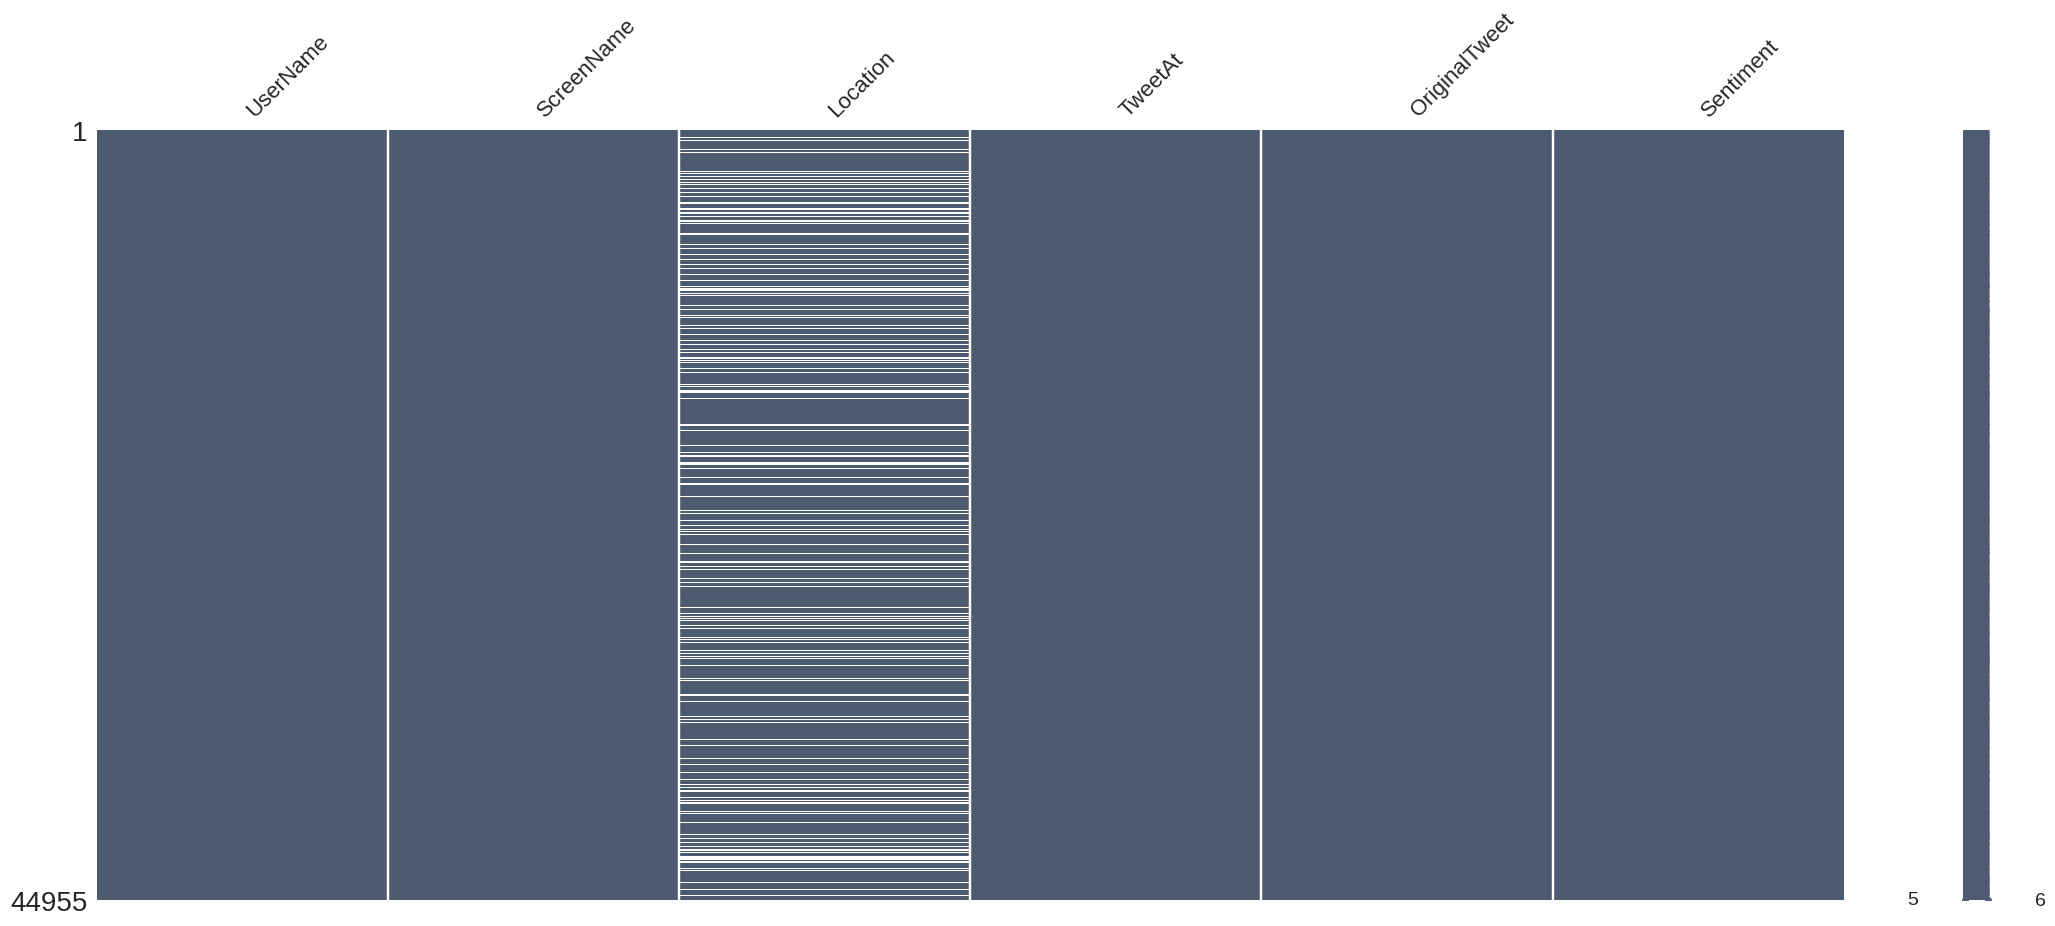

In [ ]:
#Missing data as white lines
import missingno as msno
msno.matrix(df,color=(0.3,0.36,0.44))

In [ ]:
# observation unique in every column
list_columns = df.columns.tolist()
for i in range(len(list_columns)):
  print(f'total unique of {list_columns[i]} column equal', df[f'{list_columns[i]}'].nunique())

total unique of UserName column equal 44955
total unique of ScreenName column equal 44955
total unique of Location column equal 13127
total unique of TweetAt column equal 44
total unique of OriginalTweet column equal 44955
total unique of Sentiment column equal 5


In [ ]:
print(df['Sentiment'].unique())
print(df['Sentiment'].value_counts())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64


In [ ]:
df['Sentiment'].value_counts(normalize=True)

Positive              0.275142
Negative              0.243755
Neutral               0.185341
Extremely Positive    0.160672
Extremely Negative    0.135091
Name: Sentiment, dtype: float64

In [ ]:
# conver five label(Positive, Negative, Neutral, Extremely Positive, Extremely Negative) to three label(Positive, Negative, Neutral)
def convert_sentiment(x):
  if x == 'Extremely Positive' or x == 'Positive':
    return 'Positive'
  elif x == 'Extremely Negative' or x == 'Negative':
    return 'Negative'
  elif x == 'Neutral':
    return 'Neutral'
df['Sentiment'] = df['Sentiment'].apply(lambda x:convert_sentiment(x))
df_train['Sentiment'] = df_train['Sentiment'].apply(lambda x:convert_sentiment(x))
df_test['Sentiment'] = df_test['Sentiment'].apply(lambda x:convert_sentiment(x))
print(df['Sentiment'].value_counts())
print('====================================')
print(df['Sentiment'].value_counts(normalize=True))

Positive    19592
Negative    17031
Neutral      8332
Name: Sentiment, dtype: int64
Positive    0.435814
Negative    0.378846
Neutral     0.185341
Name: Sentiment, dtype: float64


## class distribution

In [ ]:
class_df = df.groupby('Sentiment').count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
class_df

Sentiment  OriginalTweet
2  Positive          19592
0  Negative          17031
1   Neutral           8332

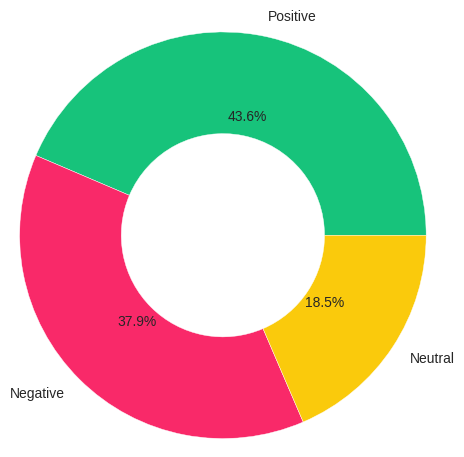

In [ ]:
colors = ['#17C37B','#F92969','#FACA0C']
my_pie,_,_ = plt.pie(class_df['OriginalTweet'],radius = 1.2,labels=class_df['Sentiment'],colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white')

plt.show()

In [ ]:
fig=make_subplots(1,2,subplot_titles=('Train set','Test set'))
x=df_train['Sentiment'].value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='train'),row=1,col=1)
x=df_test['Sentiment'].value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='test'),row=1,col=2)

## Number of characters

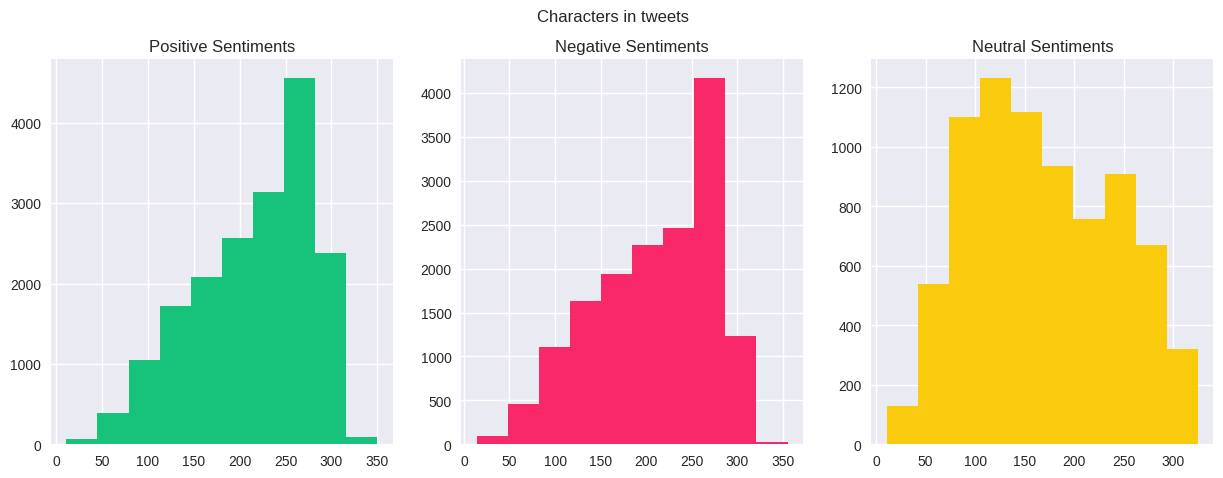

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_length=df_train[df_train['Sentiment']=="Positive"]['OriginalTweet'].str.len()
ax1.hist(tweet_length,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_length=df_train[df_train['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax2.hist(tweet_length,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_length=df_train[df_train['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax3.hist(tweet_length,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

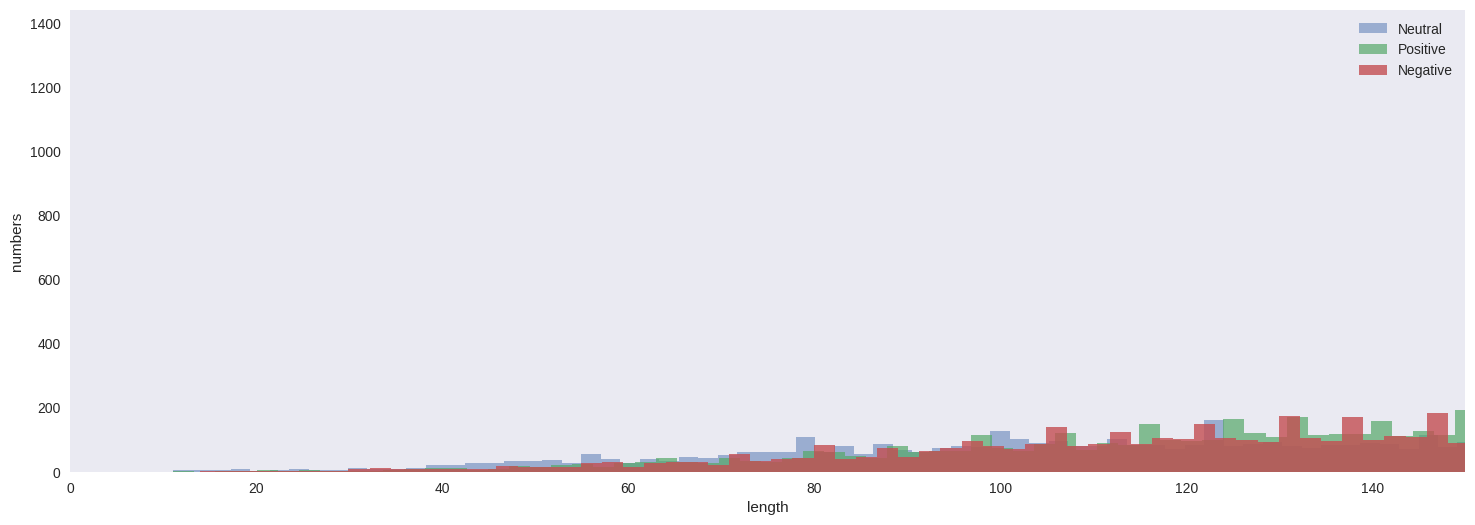

In [ ]:
df['length'] = df['OriginalTweet'].apply(lambda x: len(x))

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df[df['Sentiment'] == "Neutral"]['length'], alpha = 0.5, bins=bins, label='Neutral')
plt.hist(df[df['Sentiment'] == "Positive"]['length'], alpha = 0.7, bins=bins, label='Positive')
plt.hist(df[df['Sentiment'] == "Negative"]['length'], alpha = 0.8, bins=bins, label='Negative')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

## Number of words in a tweet

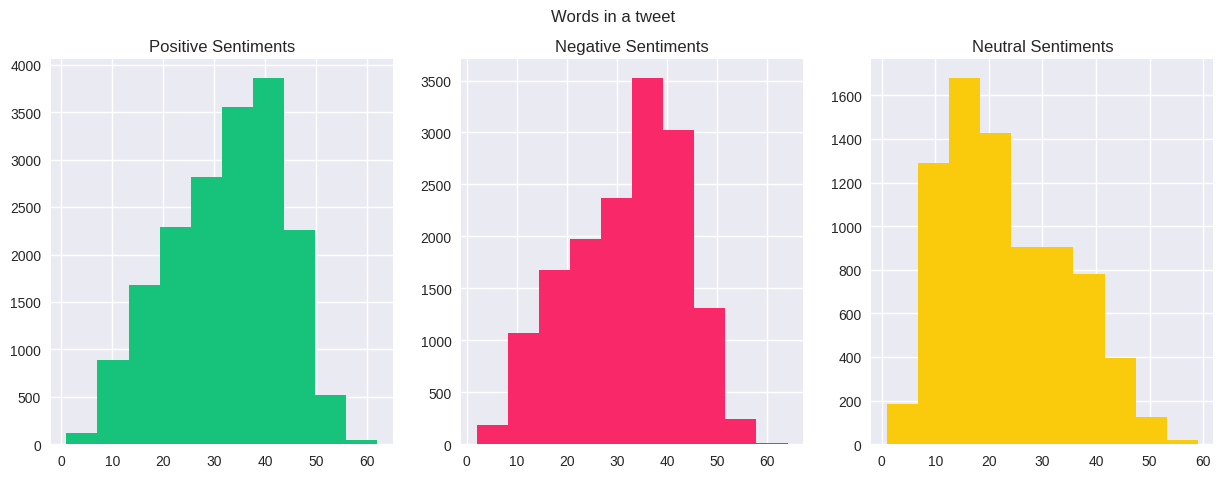

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_length=df_train[df_train['Sentiment']=="Positive"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_length,color='#17C37B')
ax1.set_title('Positive Sentiments')


tweet_length=df_train[df_train['Sentiment']=="Negative"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet_length,color='#F92969')
ax2.set_title('Negative Sentiments')

tweet_length=df_train[df_train['Sentiment']=="Neutral"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax3.hist(tweet_length,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()

## Average word length in a tweet

<ipython-input-19-c54833f04f94>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-19-c54833f04f94>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-19-c54833f04f94>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

Text(0.5, 0.98, 'Average word length in each tweet')

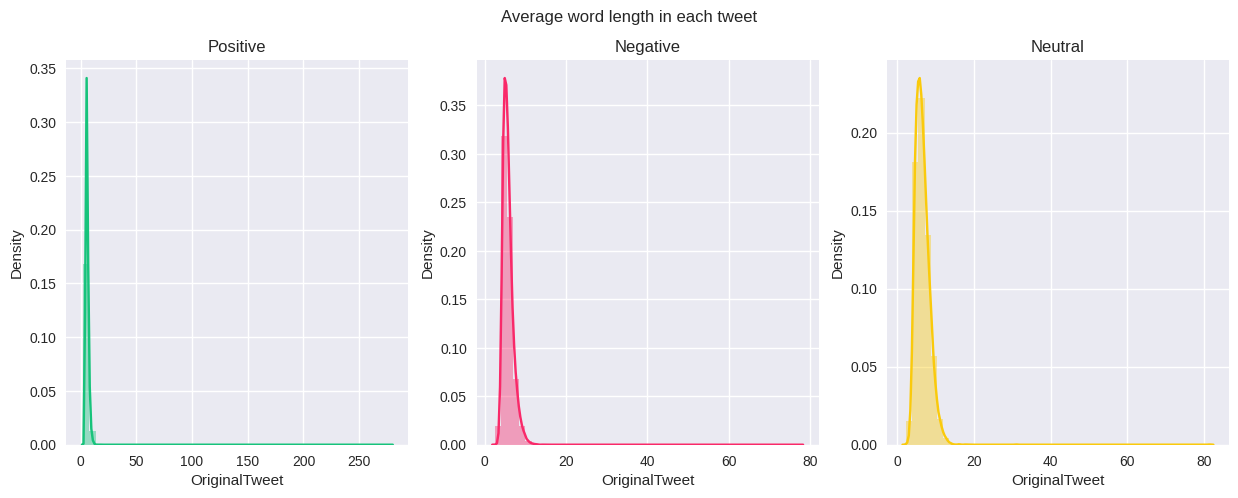

In [ ]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(15,5))

word=df_train[df_train['Sentiment']=="Positive"]['OriginalTweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Positive')


word=df_train[df_train['Sentiment']=="Negative"]['OriginalTweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#F92969')
ax2.set_title('Negative')

word=df_train[df_train['Sentiment']=="Neutral"]['OriginalTweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='#FACA0C')
ax3.set_title('Neutral')


fig.suptitle('Average word length in each tweet')

## Common Stopwords in the tweets

In [ ]:
# Positive, Negative, Neutral

def create_corpus(target):
    corpus=[]

    for x in df_train[df_train['Sentiment']==target ]['OriginalTweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

np.array(create_corpus('Positive'))

array(['advice', 'Talk', 'to', ..., 'help', 'us', 'out!!'], dtype='<U279')

In [ ]:
np.array(stop)

array({'we', 'over', 'should', 'hasn', "needn't", 'yourself', 'such', 'before', 'do', 'below', 'by', 'here', "you're", "you've", 're', 'the', 'above', 'how', 'don', 'at', 'won', 'his', 'them', 'very', "wasn't", 'some', 'further', 'you', 'me', 'myself', "should've", 'were', 'i', "mustn't", 'while', 'couldn', "isn't", 'other', 'between', 'are', "weren't", 'own', 'about', 'against', 'each', 'now', 'hers', 'from', 'those', 'up', 'isn', 'she', 'having', 'this', 'himself', 'have', 'down', 'did', 'but', 'll', 'they', "mightn't", 'why', 'whom', 'has', "shan't", 'off', 'too', "wouldn't", 'their', 'any', 've', 'doesn', 'during', 'shouldn', "hadn't", 'was', 'which', 'will', 'into', 'm', 'her', 'not', 'no', 'be', 'itself', 'been', 'd', 'just', 'ourselves', 'or', 'o', 'ma', "you'd", 'once', 'mightn', 'after', 'ours', 'hadn', 'than', 'through', "hasn't", 'most', 'that', "haven't", 'needn', 'and', 'doing', 'all', 'because', 'wasn', 't', 'shan', "didn't", 'does', 's', 'same', 'had', 'with', 'until', '

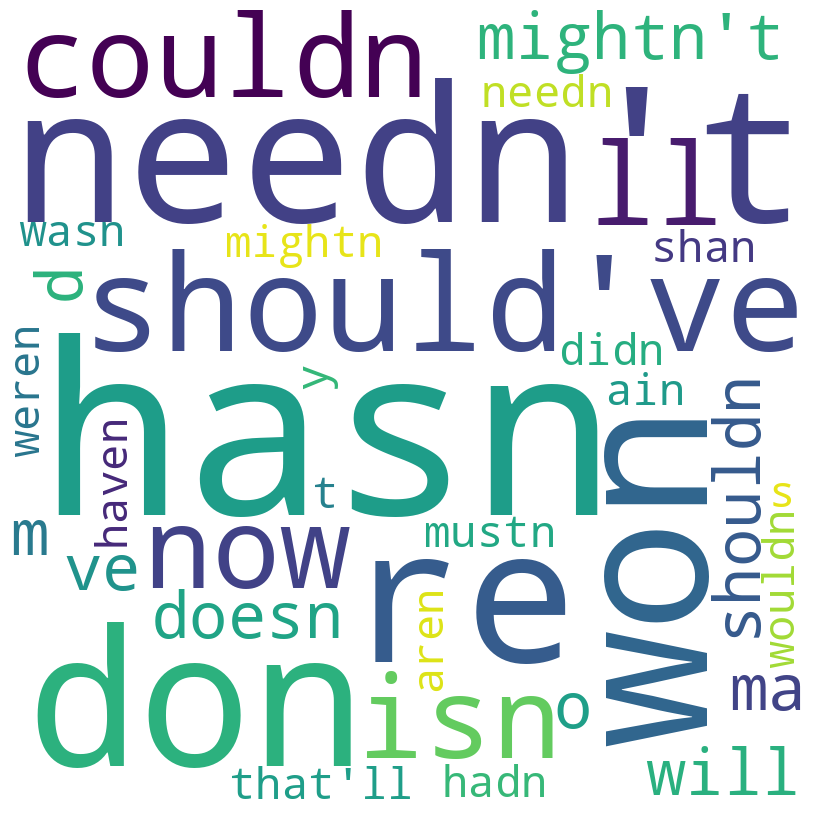

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in stop:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

<BarContainer object of 10 artists>

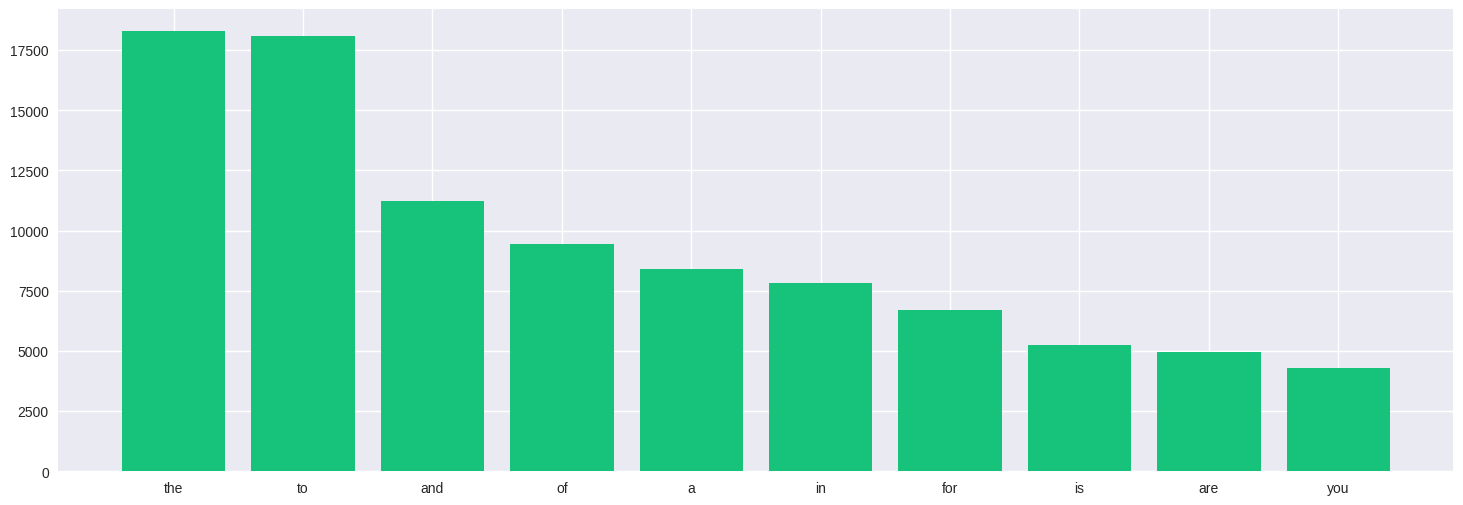

In [ ]:
corpus=create_corpus("Positive")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

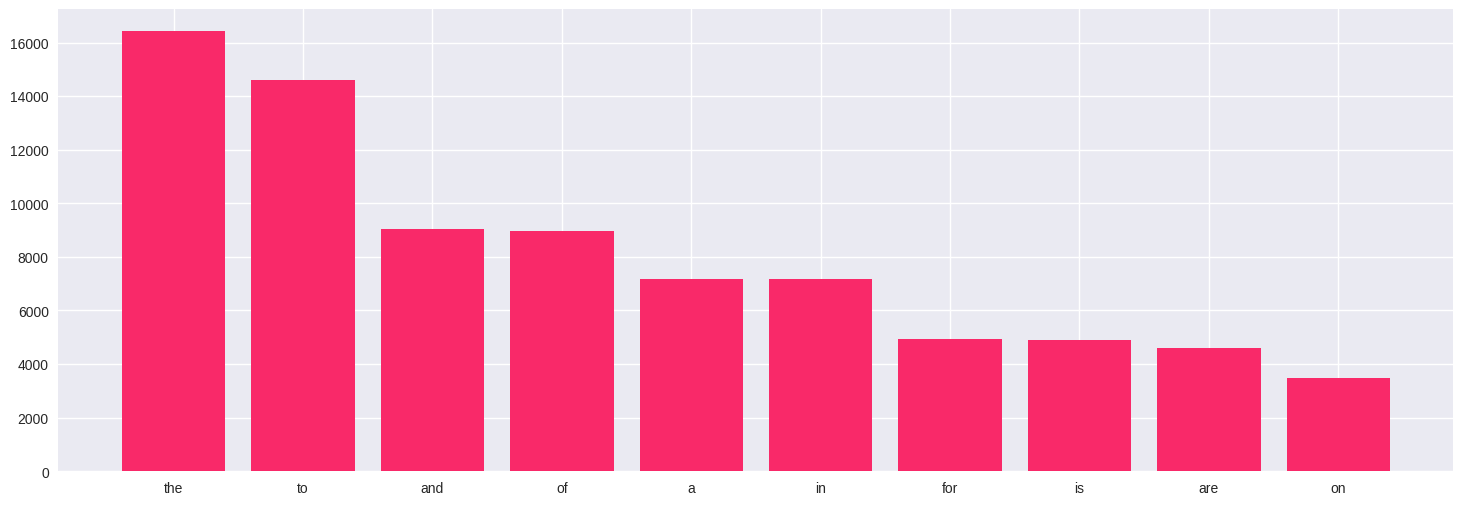

In [ ]:
corpus=create_corpus("Negative")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

<BarContainer object of 10 artists>

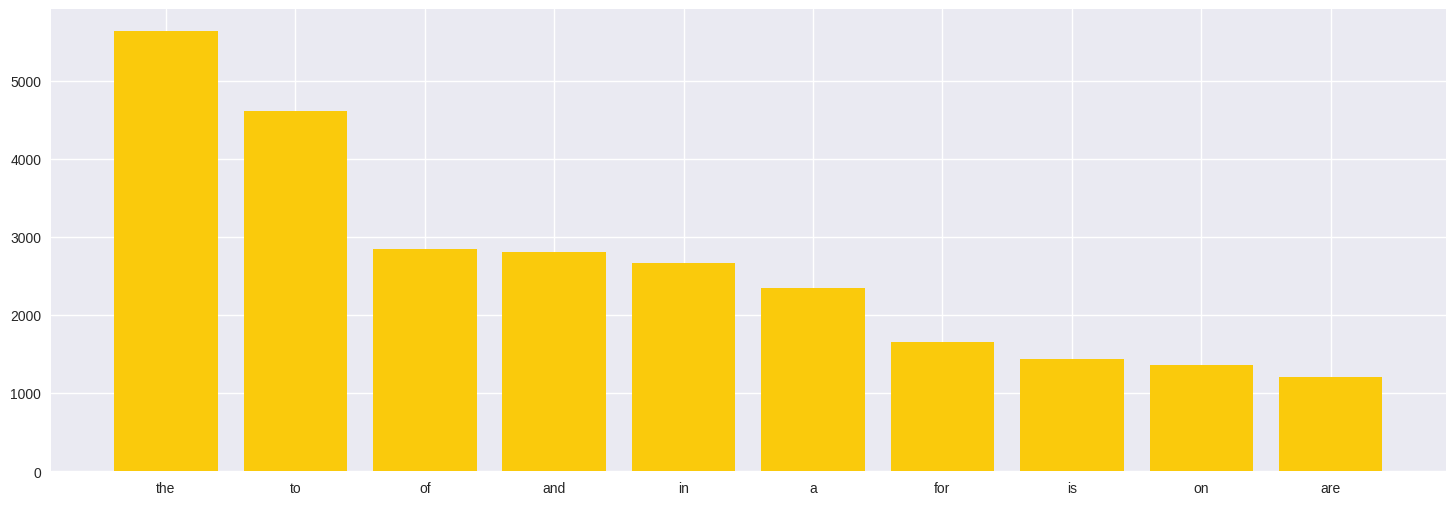

In [ ]:
corpus=create_corpus("Neutral")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y, color='#FACA0C')

## Punctuations

<BarContainer object of 27 artists>

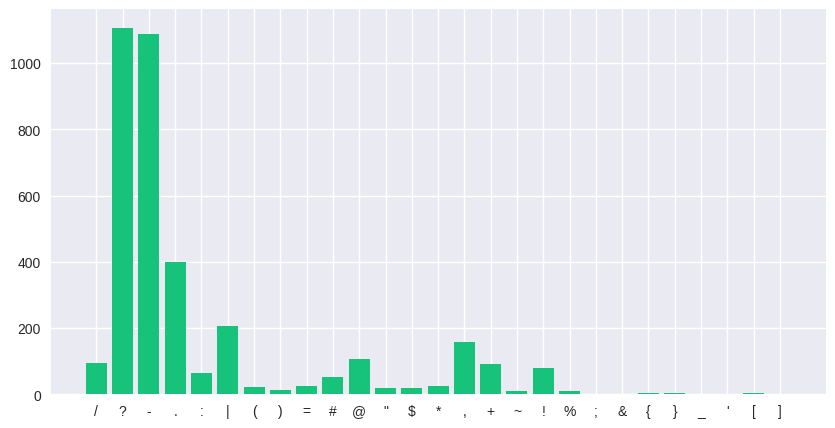

In [ ]:
plt.figure(figsize=(10,5))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

<BarContainer object of 25 artists>

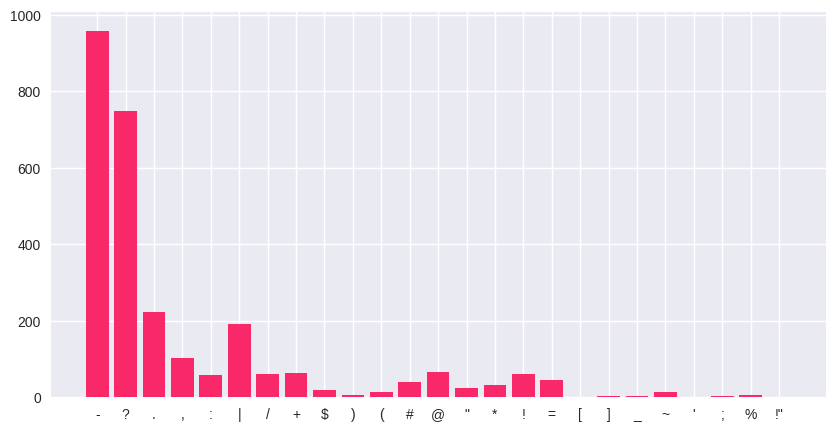

In [ ]:

plt.figure(figsize=(10,5))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

<BarContainer object of 23 artists>

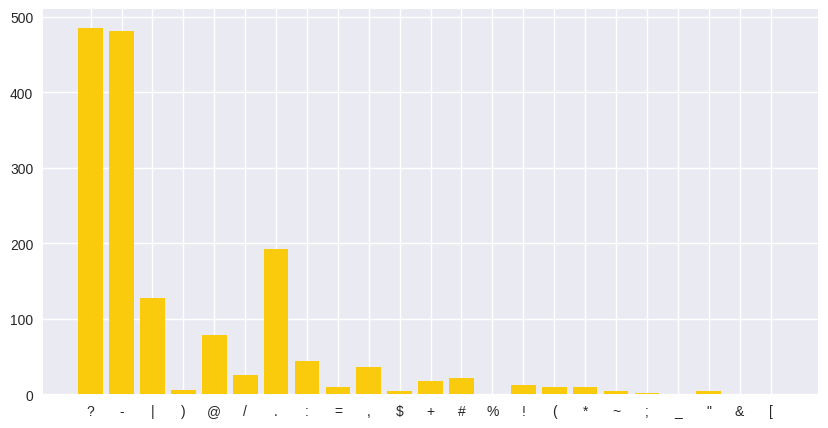

In [ ]:
plt.figure(figsize=(10,5))
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1


x,y=zip(*dic.items())
plt.bar(x,y,color='#FACA0C')


## Common Words

<Axes: >

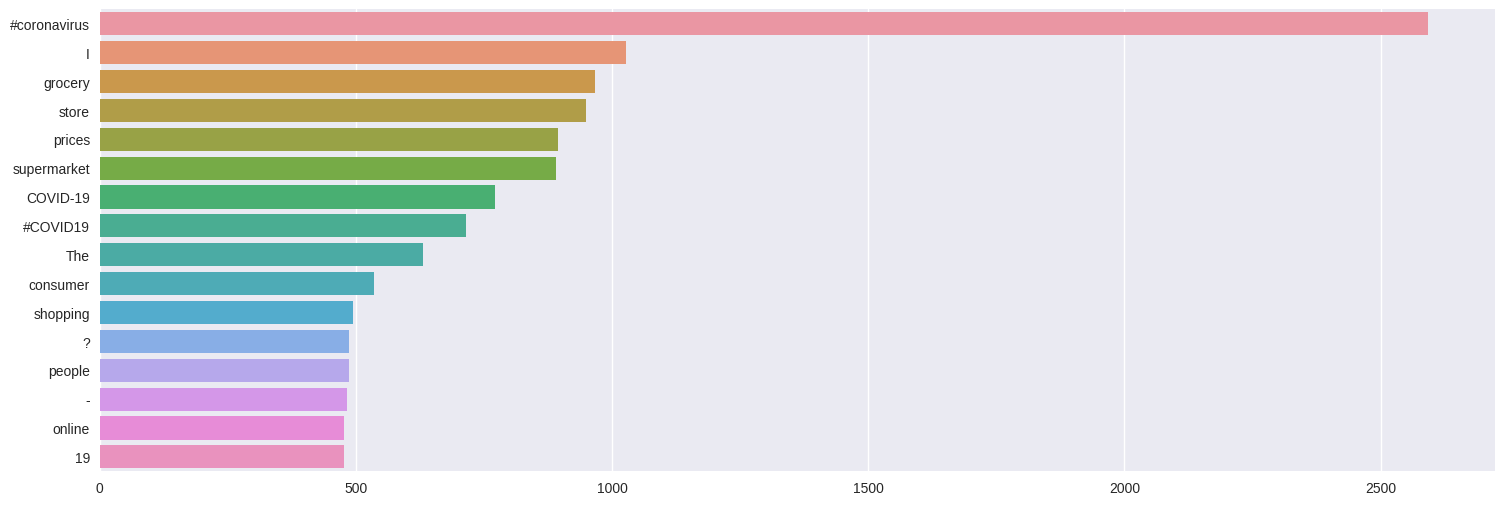

In [ ]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

## Hashtags

<Axes: xlabel='Hashtag', ylabel='count'>

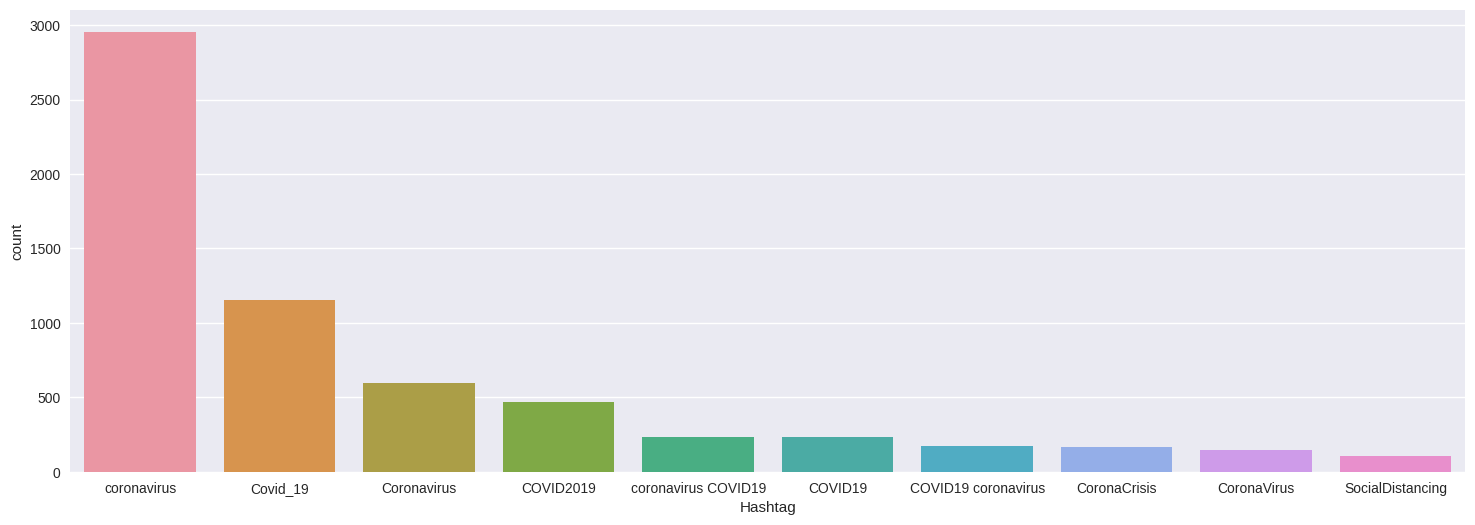

In [ ]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
df['hash']=df['OriginalTweet'].apply(lambda x:find_hash(x))
temp=df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
sns.barplot(x="Hashtag",y="count", data = temp)

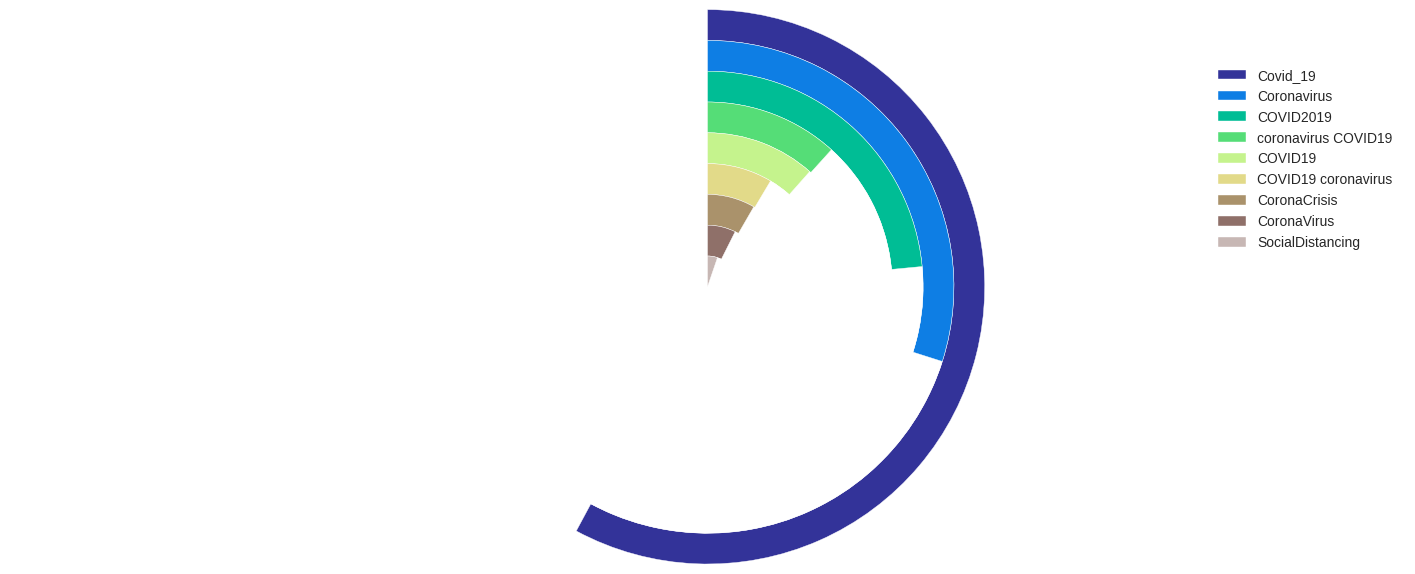

In [ ]:
from matplotlib import cm
from math import log10

labels = df['hash'].value_counts()[:][2:11].index.tolist()
data = df['hash'].value_counts()[:][2:11]

df['hash'].value_counts()[:][1:11].index.tolist()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

## Mentions

<Axes: xlabel='Mentions', ylabel='count'>

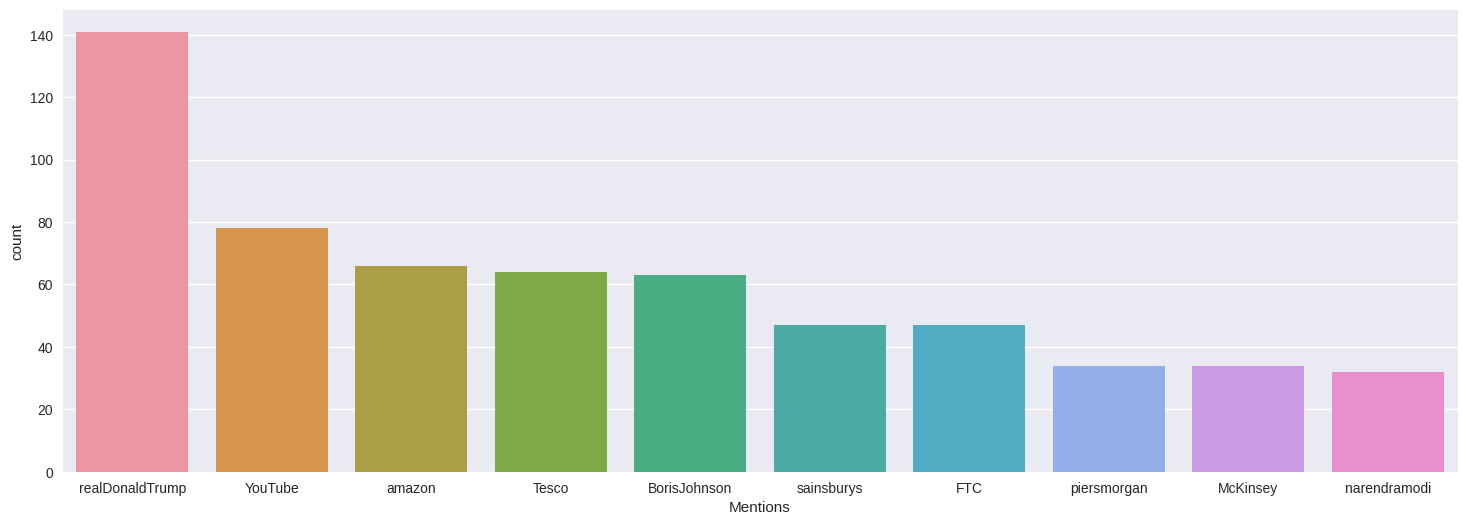

In [ ]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
df['mentions']=df['OriginalTweet'].apply(lambda x:mentions(x))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp)

In [ ]:
b = df['mentions'].value_counts()[:][1:11].index.tolist()
a = df['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='Tree of Mentions')
fig.show()

## Pre-processing

In [ ]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df['text_new']=df['OriginalTweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['text']=df['text_new'].apply(lambda x:remove_html(x))

In [ ]:
# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
df['text_new']=df['text'].apply(lambda x:lower(x))


# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df['text']=df['text_new'].apply(lambda x:remove_num(x))


In [ ]:
#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df['text_new']=df['text'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text']=df['text_new'].apply(lambda x:remove_stopwords(x))

In [ ]:
#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['text_new']=df['text'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['text']=df['text_new'].apply(lambda x:remove_hash(x))

In [ ]:
#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
df['text_new']=df['text'].apply(lambda x:remove_space(x))

df = df.drop(columns=['text_new'])

## Wordclouds

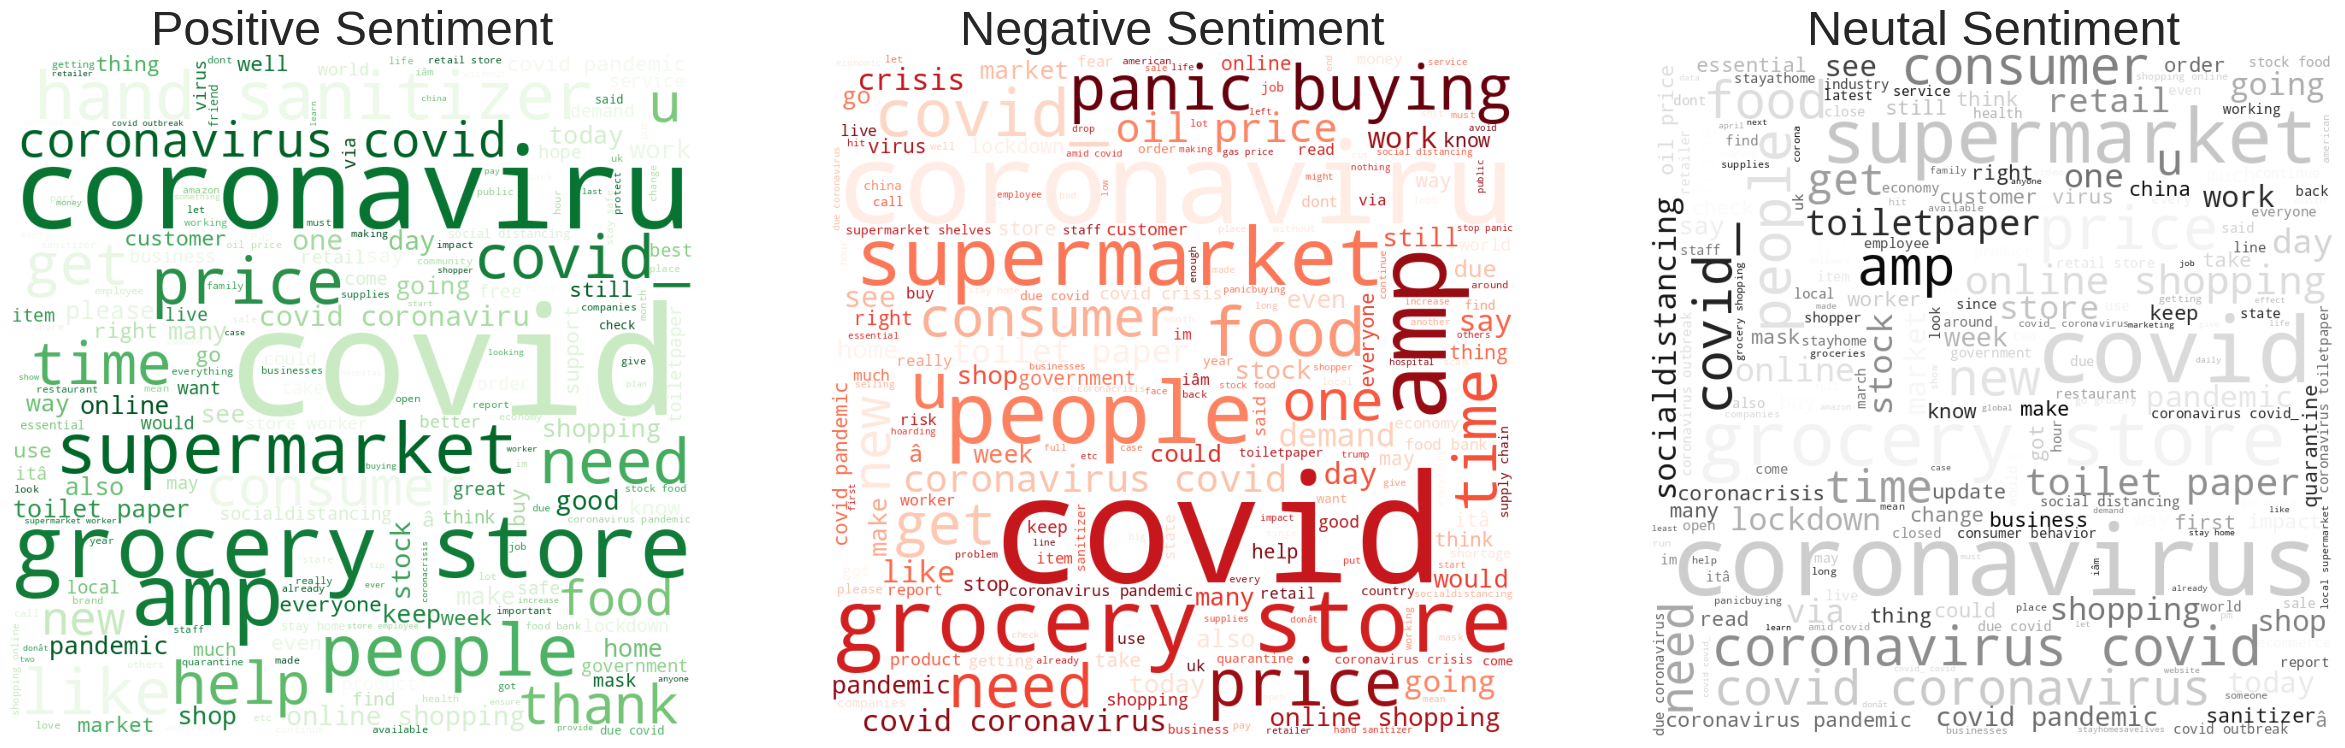

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = df[df["Sentiment"]=="Positive"]
df_neg = df[df["Sentiment"]=="Negative"]
df_neu = df[df["Sentiment"]=="Neutral"]

comment_words = ''
stopwords = set(STOPWORDS)

for val in df_pos.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "


wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);

In [ ]:
del df_pos
del df_neg
del df_neu

## N-grams

### Unigrams

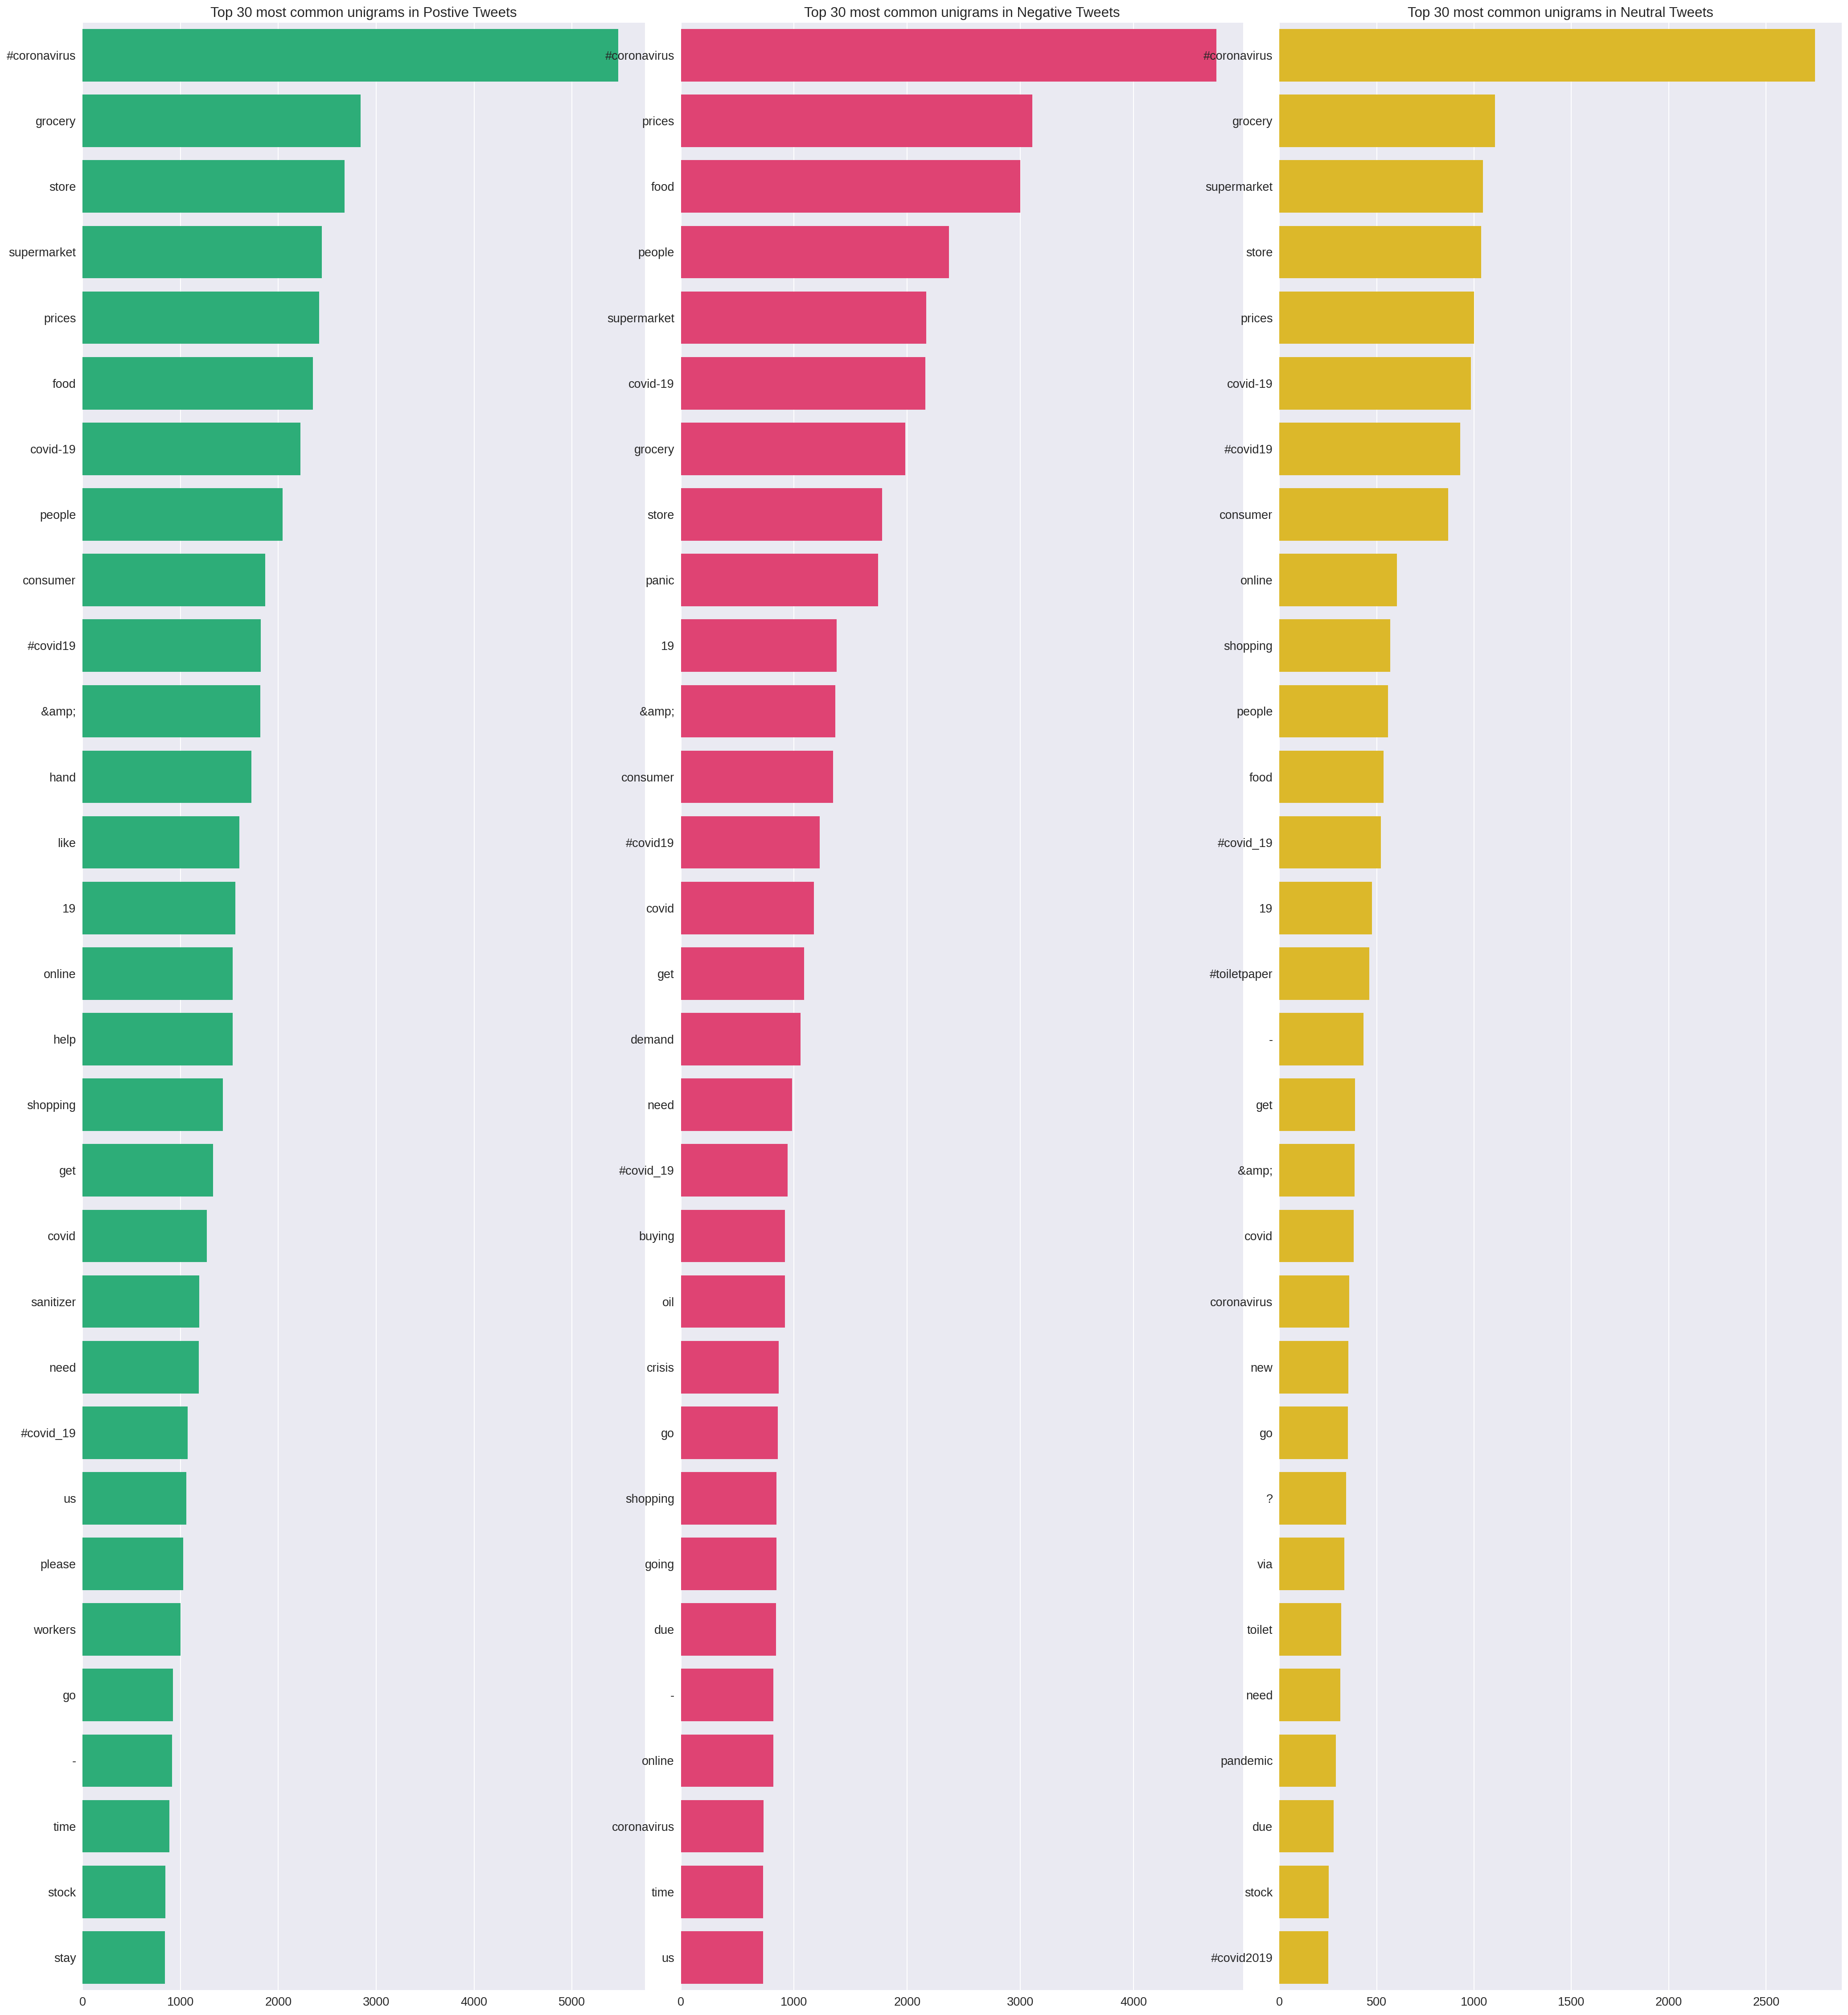

In [ ]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30



positive= df_train["Sentiment"]== "Positive"
negative= df_train["Sentiment"]== "Negative"
neutral= df_train["Sentiment"]== "Neutral"

positive_unigrams = defaultdict(int)
neutral_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

# Unigrams
for tweet in df_train[positive]['OriginalTweet']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1

for tweet in df_train[negative]['OriginalTweet']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1

for tweet in df_train[neutral]['OriginalTweet']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1

df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_unigrams = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_unigrams[0].values[:N], x=df_neutral_unigrams[1].values[:N], ax=axes[2], color='#FACA0C')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common unigrams in Neutral Tweets', fontsize=15)

plt.show()

### Bi grams

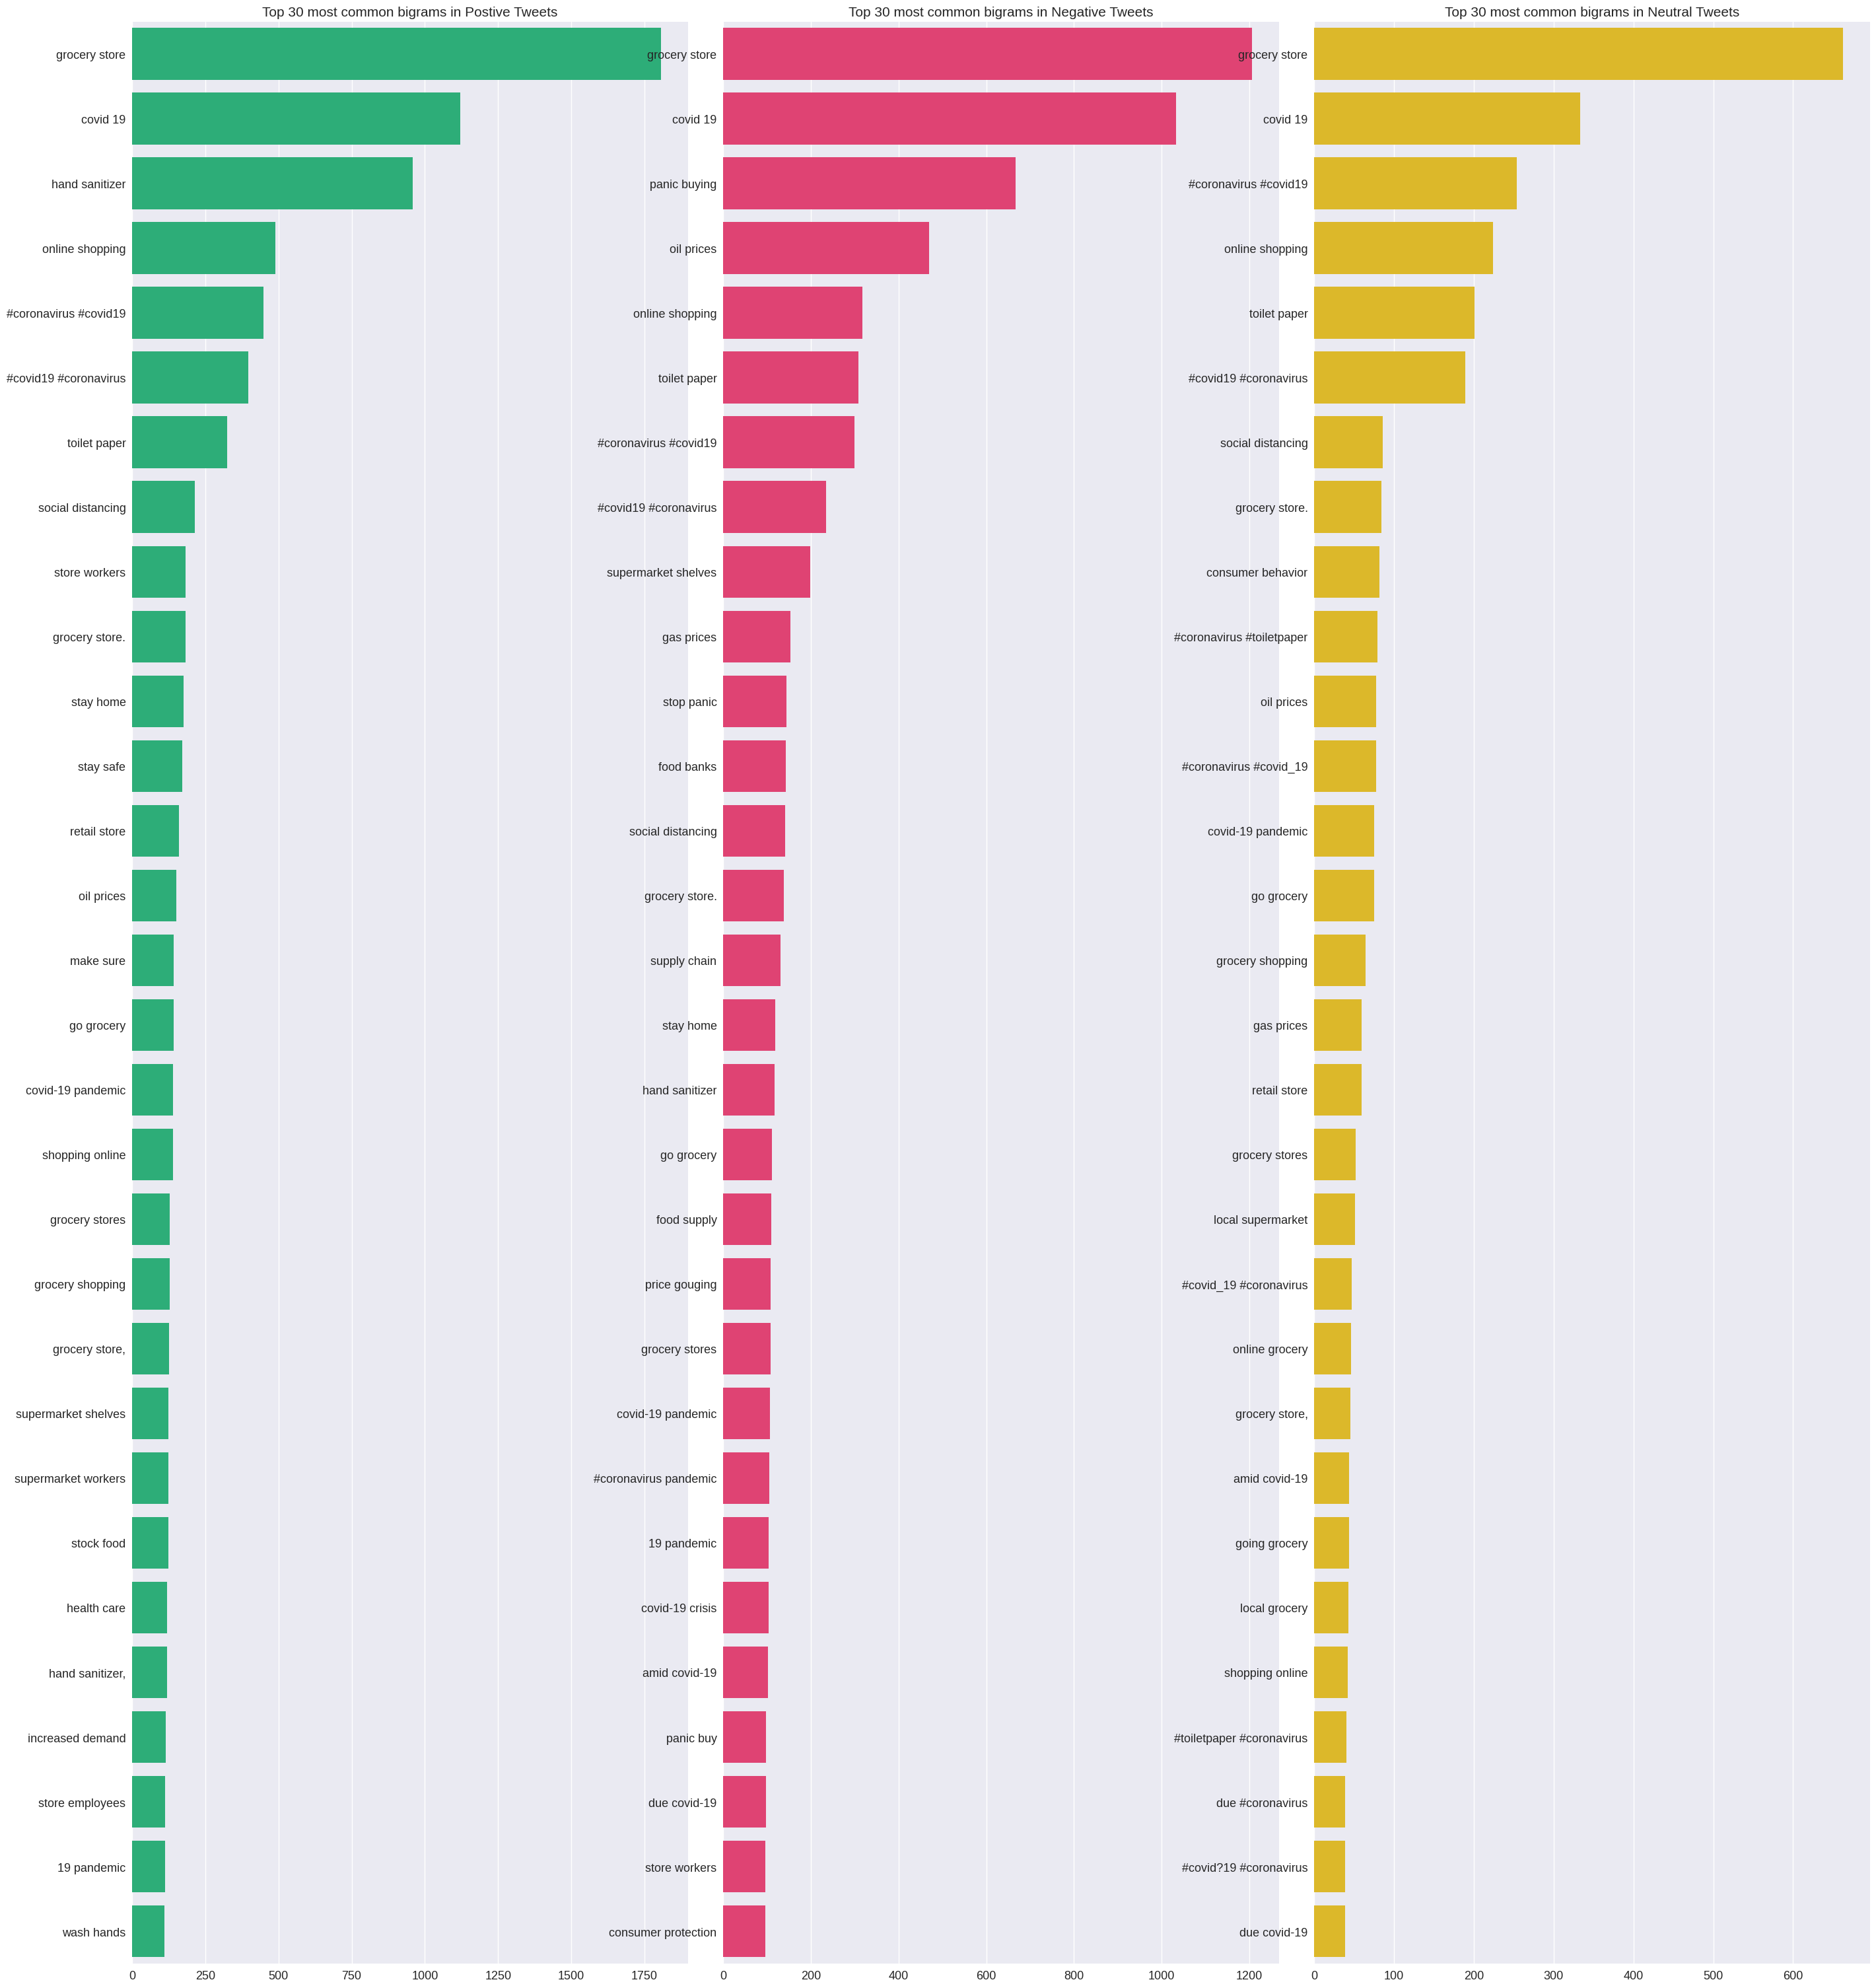

In [ ]:
# Bigrams
positive_bigrams = defaultdict(int)
neutral_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

for tweet in df_train[positive]['OriginalTweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1

for tweet in df_train[negative]['OriginalTweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1

for tweet in df_train[neutral]['OriginalTweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        neutral_bigrams[word] += 1

df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_bigrams = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_bigrams[0].values[:N], x=df_neutral_bigrams[1].values[:N], ax=axes[2], color='#FACA0C')


for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common bigrams in Neutral Tweets', fontsize=15)

plt.show()


### Tri-grams

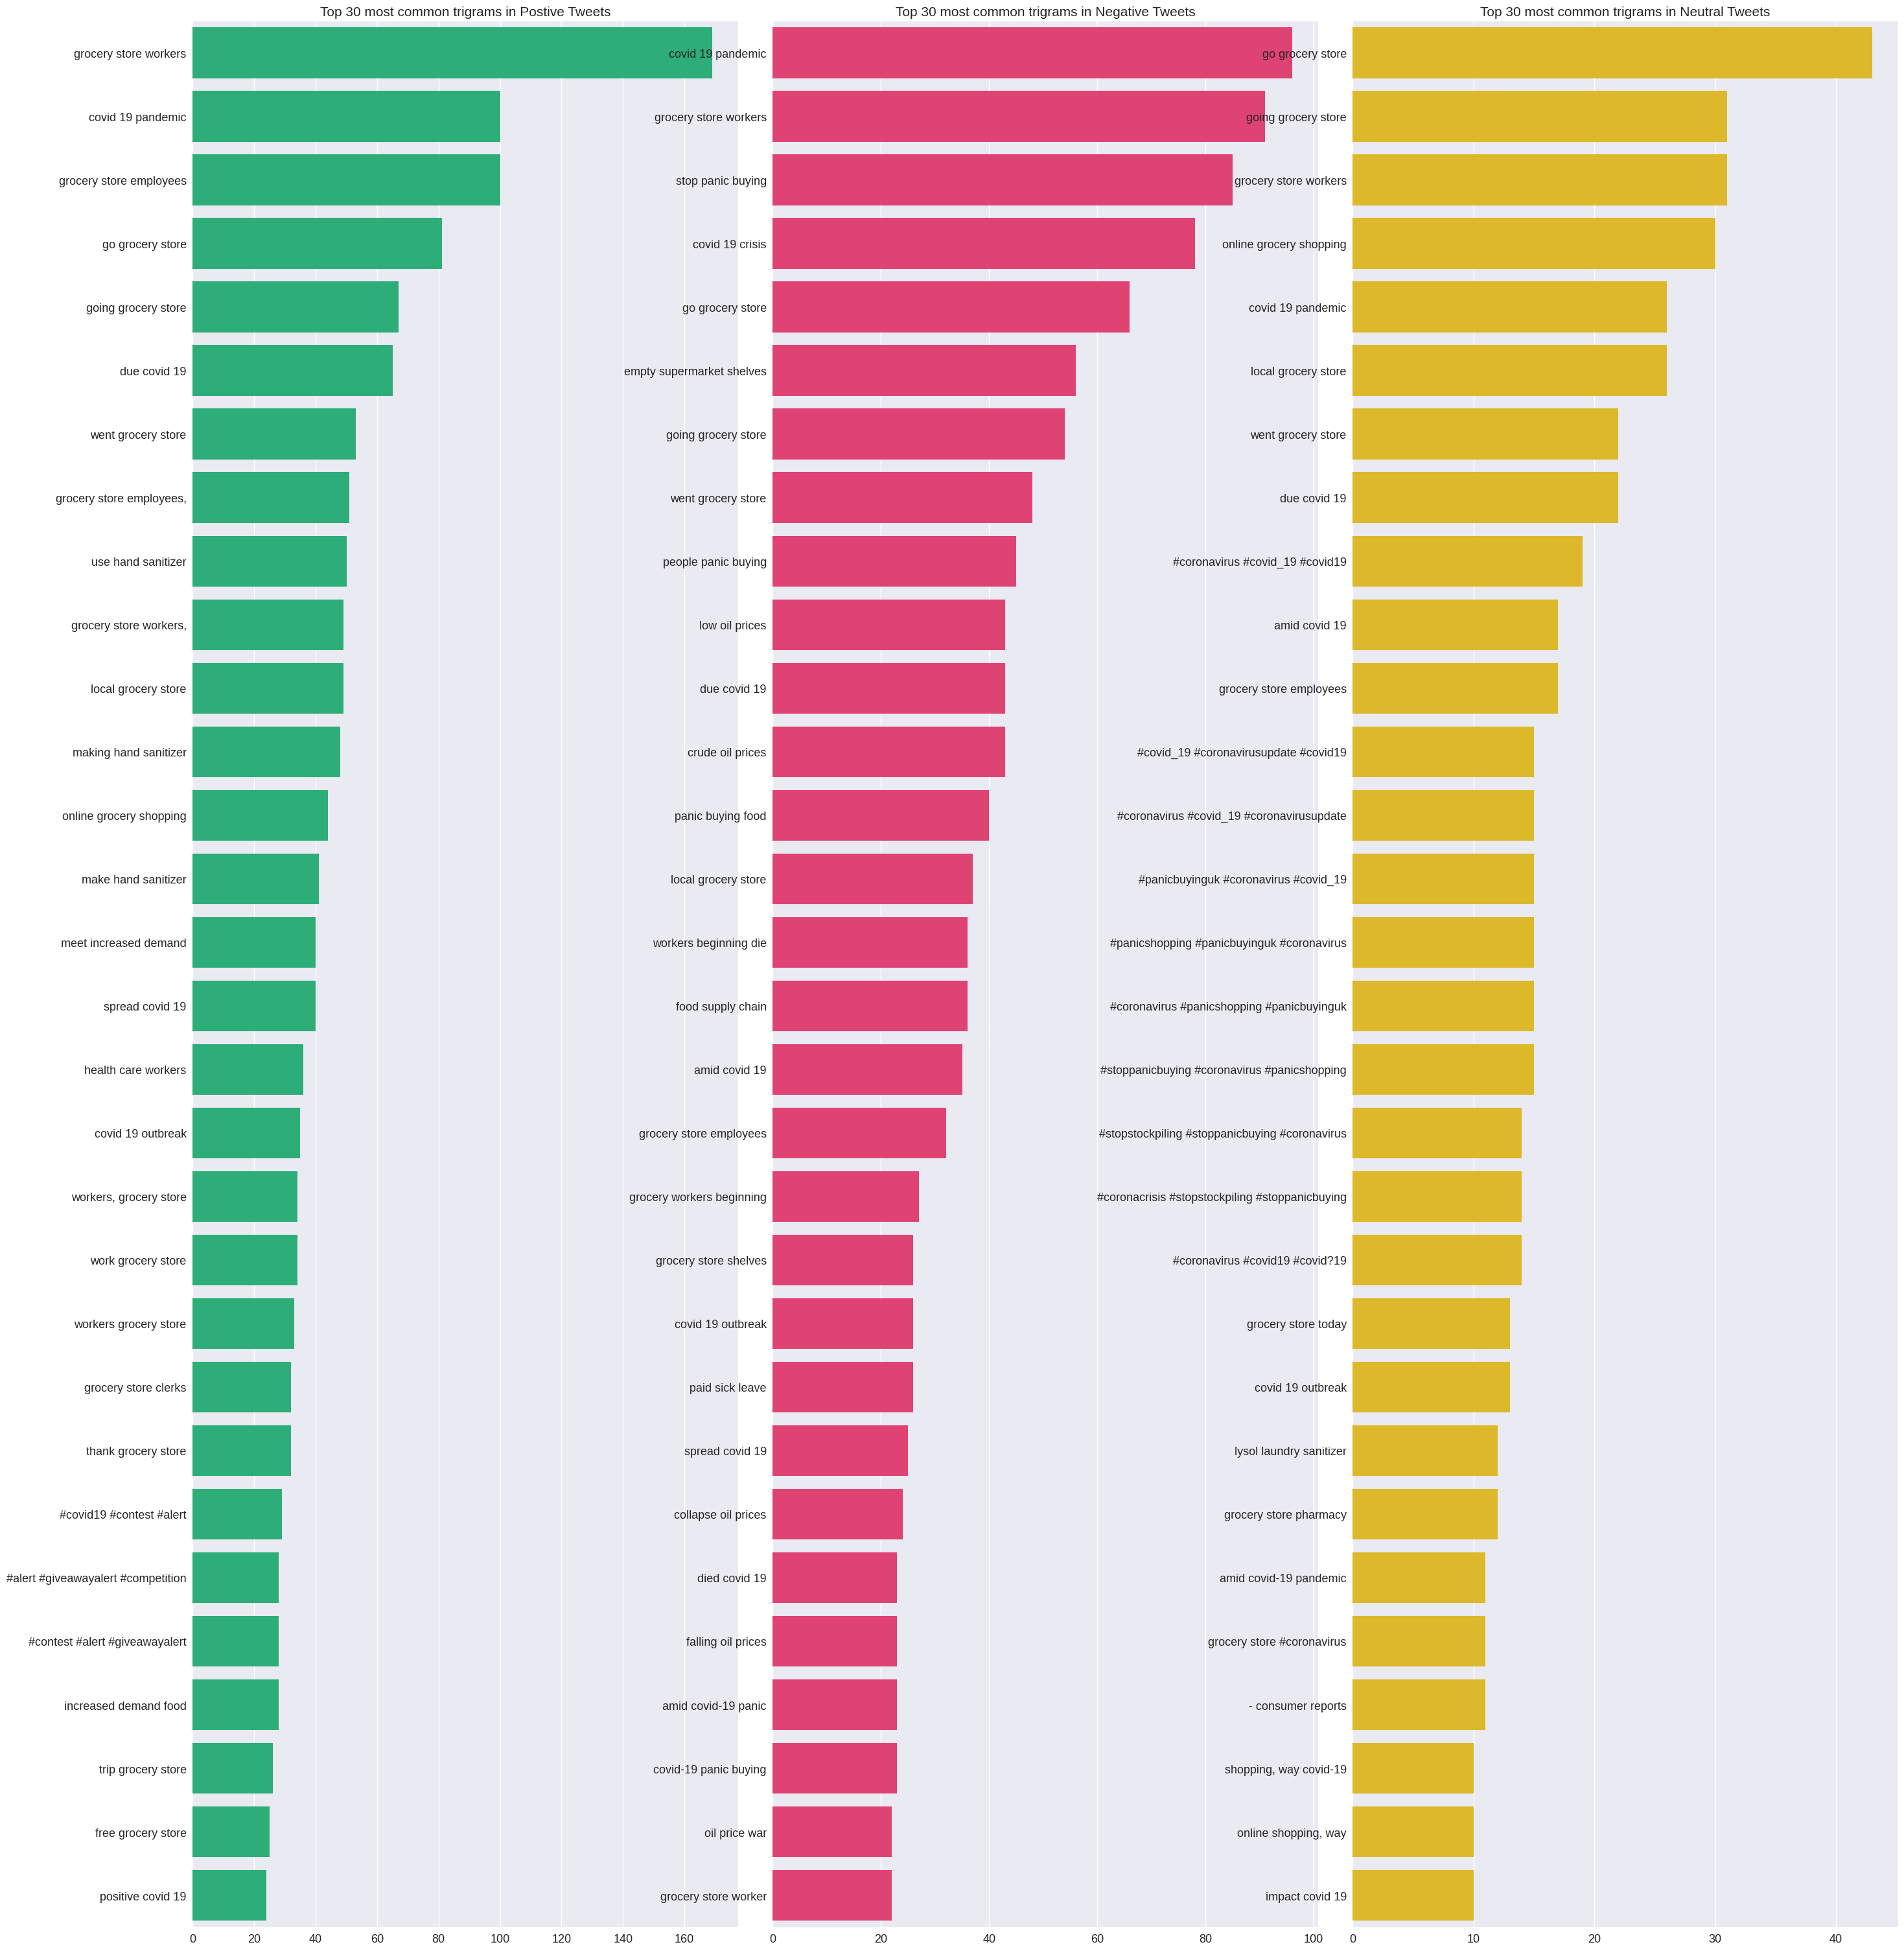

In [ ]:
# Trigrams
positive_trigrams = defaultdict(int)
neutral_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in df_train[positive]['OriginalTweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1

for tweet in df_train[negative]['OriginalTweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1

for tweet in df_train[neutral]['OriginalTweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        neutral_trigrams[word] += 1

df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_neutral_trigrams = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=3, figsize=(27, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='#F92969')
sns.barplot(y=df_neutral_trigrams[0].values[:N], x=df_neutral_trigrams[1].values[:N], ax=axes[2], color='#FACA0C')




for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common trigrams in Neutral Tweets', fontsize=15)

plt.show()

In [ ]:
# export for use in text representation step
df.to_csv('/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/text_clean.csv')

## result of visualization

- There is an uneven distribution of classes, with positive taking the largest pie followed by negative. The colors used above will represent the classes ahead. The same pattern of uneven distribution in both train and test data
- Many stopwords are present. Require preprocessing
- Punctuations must be cleaned.
- Common words feature punctuations, and we need extensive data cleaning.
- While the lower casing is required, we can see that hashtags contain keywords related to coronavirus.


# Text Representation

Our main objective is to transform a given text into numerical form so that it can be fed into NLP and ML algorithms.

## IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## clean data and tokenization

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/text_clean.csv")
del df['Unnamed: 0']
del df['UserName']
del df['ScreenName']
del df['Location']
del df['TweetAt']
del df['OriginalTweet']
del df['length']
del df['hash']
del df['mentions']
df

Sentiment                                               text
0       Neutral                       menyrbie phil_gahan chrisitv
1      Positive  advice talk neighbours family exchange phone n...
2      Positive  coronavirus australia woolworths give elderly ...
3      Positive  food stock one empty please dont panic enough ...
4      Negative  ready go supermarket covid outbreak im paranoi...
...         ...                                                ...
44952  Positive  meanwhile supermarket israel people dance sing...
44953  Negative  panic buy lot nonperishable items echo needs f...
44954   Neutral  asst prof economics cconces nbcphiladelphia ta...
44955  Negative  gov need somethings instead biar je rakyat ass...
44956  Positive  forestandpaper members committed safety employ...

[44957 rows x 2 columns]

In [ ]:
def preprocess_text(sentence, stem = False):
    tags = r"@\w*"
    sentence = [re.sub(tags, "", sentence)]
    text = []
    for word in sentence:

        if word not in stopwords:

            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
    return tokenizer.tokenize(" ".join(text))

print(f"Orignal Text : {df['text'][11]}")
print()
print(f"Preprocessed Text : {preprocess_text(df['text'][11])}")

Orignal Text : due covid situation increased demand food products wait time may longer online orders particularly beef share freezer packs thank patience time

Preprocessed Text : ['due', 'covid', 'situation', 'increased', 'demand', 'food', 'products', 'wait', 'time', 'may', 'longer', 'online', 'orders', 'particularly', 'beef', 'share', 'freezer', 'packs', 'thank', 'patience', 'time']


In [ ]:
df["tokenization"] = df["text"].replace(np.nan, '').map(preprocess_text)
df['text_clean'] = df['text']
del df['text']
df.head()

Sentiment                                       tokenization  \
0   Neutral                   [menyrbie, phil_gahan, chrisitv]   
1  Positive  [advice, talk, neighbours, family, exchange, p...   
2  Positive  [coronavirus, australia, woolworths, give, eld...   
3  Positive  [food, stock, one, empty, please, dont, panic,...   
4  Negative  [ready, go, supermarket, covid, outbreak, im, ...   

                                          text_clean  
0                       menyrbie phil_gahan chrisitv  
1  advice talk neighbours family exchange phone n...  
2  coronavirus australia woolworths give elderly ...  
3  food stock one empty please dont panic enough ...  
4  ready go supermarket covid outbreak im paranoi...

## One-Hot Encoding

In [ ]:
data_vocab = []
for text in df['tokenization']:
    for word in text:
        if word not in data_vocab:
            data_vocab.append(word)

In [ ]:
#function to return one-hot representation of passed text
def get_onehot_representation(text, vocab = data_vocab):
    onehot_encoded = []
    for word in text:
        temp = [0]*len(vocab)
        temp[vocab.index(word)-1] = 1
        onehot_encoded.append(temp)
    return onehot_encoded

print("One Hot Representation for sentence \"the cat sat on the mat\" :")
sample_vocab = ['the', 'cat', 'sat', 'on', 'mat', 'dog', 'run', 'green', 'tree']
get_onehot_representation(['the', 'cat', 'sat', 'on', 'the', 'mat'], sample_vocab)

One Hot Representation for sentence "the cat sat on the mat" :


[[0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0]]

In [ ]:
print(f'Length of Vocabulary : {len(data_vocab)}')
print(f'Sample of Vocabulary : {data_vocab[302 : 312]}')

Length of Vocabulary : 62802
Sample of Vocabulary : ['iptvdeals', 'football', 'hd', 'movies', 'adult', 'cinema', 'hotmovies', 'iptvnew', 'iptvlinks', 'downingstreet']


In [ ]:
sample_one_hot_rep = get_onehot_representation(df['tokenization'][7], data_vocab)
print(f"Shapes of a single sentence : {np.array(sample_one_hot_rep).shape}")

Shapes of a single sentence : (9, 62802)


## Bag of words

In [ ]:
sample_bow = CountVectorizer()

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_bow.fit(sample_corpus)

def get_bow_representation(text):
        return sample_bow.transform(text)

print(f"Vocabulary mapping for given sample corpus : \n {sample_bow.vocabulary_}")
print("\nBag of word Representation of sentence 'the cat cat sat in the hat'")
print(get_bow_representation(["the cat cat sat in the hat"]).toarray())

Vocabulary mapping for given sample corpus : 
 {'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

Bag of word Representation of sentence 'the cat cat sat in the hat'
[[2 1 1 1 2 0]]


In [ ]:
sample_bow = CountVectorizer(binary = True)

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_bow.fit(sample_corpus)

def get_bow_representation(text):
        return sample_bow.transform(text)

print(f"Vacabulary mapping for given sample corpus : \n {sample_bow.vocabulary_}")
print("\nBag of word Representation of sentence 'the the the the cat cat sat in the hat'")
print(get_bow_representation(["the the the the cat cat sat in the hat"]).toarray())

Vacabulary mapping for given sample corpus : 
 {'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

Bag of word Representation of sentence 'the the the the cat cat sat in the hat'
[[1 1 1 1 1 0]]


In [ ]:
bow = CountVectorizer()
bow_rep = bow.fit_transform(df.loc[:, 'tokenization'].astype('str'))
bow_rep

<44957x62781 sparse matrix of type '<class 'numpy.int64'>'
	with 779296 stored elements in Compressed Sparse Row format>

In [ ]:
print(f"Shape of Bag of word representaion matrix : {bow_rep.toarray().shape}")

Shape of Bag of word representaion matrix : (44957, 62781)


## Bag of N-Grams

In [ ]:
# Bag of 1-gram (unigram)
from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (1, 1))

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus)

def get_boN_representation(text):
        return sample_boN.transform(text)

print(f"Unigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 1-gram (unigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

Unigram Vocabulary mapping for given sample corpus : 
 {'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

Bag of 1-gram (unigram) Representation of sentence 'the cat cat sat in the hat'
[[2 1 1 1 2 0]]


In [ ]:
# Bag of 2-gram (bigram)
from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (2, 2))

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus)

def get_boN_representation(text):
        return sample_boN.transform(text)

print(f"Bigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 2-gram (bigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

Bigram Vocabulary mapping for given sample corpus : 
 {'the cat': 4, 'cat sat': 0, 'sat in': 3, 'in the': 2, 'the hat': 5, 'cat with': 1, 'with the': 6}

Bag of 2-gram (bigram) Representation of sentence 'the cat cat sat in the hat'
[[1 0 1 1 1 1 0]]


In [ ]:
# Bag of 3-gram (trigram)
from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (3, 3))

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus)

def get_boN_representation(text):
        return sample_boN.transform(text)

print(f"Trigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 3-gram (trigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

Trigram Vocabulary mapping for given sample corpus : 
 {'the cat sat': 4, 'cat sat in': 0, 'sat in the': 3, 'in the hat': 2, 'the cat with': 5, 'cat with the': 1, 'with the hat': 6}

Bag of 3-gram (trigram) Representation of sentence 'the cat cat sat in the hat'
[[1 0 1 1 0 0 0]]


## TF-IDF

In [ ]:
tfidf = TfidfVectorizer()

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]
tfidf_rep = tfidf.fit_transform(sample_corpus)
print(f"IDF Values for sample corpus : {tfidf.idf_}")


print("TF-IDF Representation for sentence 'the cat sat in the hat' :")
print(tfidf.transform(["the cat sat in the hat"]).toarray())

IDF Values for sample corpus : [1.         1.28768207 1.69314718 1.28768207 1.         1.69314718]
TF-IDF Representation for sentence 'the cat sat in the hat' :
[[0.29903422 0.385061   0.50630894 0.385061   0.59806843 0.        ]]


## Word2vec Word Embeddings

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
pretrained_path = "/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/GoogleNews-vectors-negative300.bin"

Word2VecModel = KeyedVectors.load_word2vec_format(pretrained_path, binary = True)

In [ ]:
print(Word2VecModel.most_similar('good'))

[('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348341941833), ('nice', 0.6836092472076416), ('excellent', 0.644292950630188), ('fantastic', 0.6407778263092041), ('better', 0.6120728850364685), ('solid', 0.5806034803390503), ('lousy', 0.576420247554779)]


In [ ]:
print(Word2VecModel['good'])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891  0.08496094  0.23535156 -0.10107422 -0.03564453
 -0.04736328  0.04736328 -0.14550781 -0.10986328  0.14746094 -0.23242188
 -0.07275391  0.19628906 -0.37890625 -0.07226562  0.04833984  0.11914062
  0.06103516 -0.12109375 -0.27929688  0.05200195  0.04907227 -0.02709961
  0.1328125   0.03369141 -0.32226562  0.04223633 -0.08789062  0.15429688
  0.09472656  0.10351562 -0.02856445  0.00128174 -0.0042

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

print("Sentences on Which We are gonna train our CBOW Word2Vec Model:\n")
print(common_texts)

Our_CBOW_Word2Vec_Model = Word2Vec(common_texts, vector_size = 10, window = 5, min_count = 1, workers = 8, sg = 0)
Our_CBOW_Word2Vec_Model.save("Our_CBOW_Word2Vec_Model.w2v")
print("Model Saved")

Sentences on Which We are gonna train our CBOW Word2Vec Model:

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]
Model Saved


In [ ]:
Our_CBOW_Word2Vec_Model.wv.most_similar('human', topn = 5)

[('graph', 0.3586882948875427),
 ('system', 0.22743132710456848),
 ('time', 0.1153423935174942),
 ('interface', 0.09816545248031616),
 ('survey', 0.01448808517307043)]

In [ ]:
Our_CBOW_Word2Vec_Model.wv['human']

array([-0.00410223, -0.08368949, -0.05600012,  0.07104538,  0.0335254 ,
        0.0722567 ,  0.06800248,  0.07530741, -0.03789154, -0.00561806],
      dtype=float32)

## Glove Word Embeddings

In [ ]:
# Glove_path = "../input/glove6b/glove.6B.100d.txt"
Glove_path = "/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/glove.6B.100d.txt"
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(Glove_path, word2vec_output_file)

<ipython-input-29-2fb053c835f7>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(Glove_path, word2vec_output_file)


(400000, 100)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = './glove.6B.100d.txt.word2vec'
Glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
print("Most similar words to word 'human' : ")
Glove_model.most_similar('human')

Most similar words to word 'human' : 


[('animal', 0.7462460398674011),
 ('rights', 0.7322573661804199),
 ('humans', 0.6607711911201477),
 ('animals', 0.6567643284797668),
 ('body', 0.6552972197532654),
 ('nature', 0.6483666896820068),
 ('beings', 0.6467736959457397),
 ('organization', 0.6319881081581116),
 ('scientific', 0.630841076374054),
 ('common', 0.6211239099502563)]

In [ ]:
print("Glove Word Embeddings of word 'human' ")
Glove_model['human']

Glove Word Embeddings of word 'human' 


array([ 3.3864e-01,  5.9663e-01,  5.3322e-01,  3.1404e-01,  1.5321e-01,
        3.1749e-01, -4.2940e-01, -2.9150e-01, -2.1047e-03, -3.9309e-01,
       -8.5441e-01, -8.0708e-02,  1.2118e+00,  6.9316e-02,  8.0613e-03,
        8.7888e-01,  3.1908e-02,  5.8655e-01, -5.4892e-01, -7.8468e-03,
        1.7327e-01, -2.6693e-01,  4.2802e-01,  6.6123e-02,  5.1847e-01,
        7.7226e-01,  2.0608e-01, -4.5836e-01,  3.5485e-01,  7.1547e-01,
        6.0855e-01,  2.0254e-01, -4.8756e-01,  5.7974e-01,  8.6728e-02,
       -5.1852e-01, -3.7274e-01,  1.0014e+00, -2.9259e-01,  3.2290e-01,
       -9.7563e-01, -2.2288e-01, -2.3335e-01, -2.6891e-01,  1.4612e-01,
        1.2004e-01, -2.0402e-01, -9.4647e-02, -1.5402e+00, -5.9510e-02,
        1.0887e+00, -2.4998e-01, -2.5808e-01,  1.2798e+00, -1.2849e-01,
       -1.4511e+00, -2.4686e-01, -9.5046e-02,  1.7425e+00,  1.1977e-01,
       -1.9206e-01,  4.4368e-01, -1.6453e-01, -7.6663e-01,  1.1100e+00,
        4.6748e-01, -2.4673e-02,  4.7179e-03,  6.9761e-01, -2.29

## FastText Word Embeddings

In [ ]:
from gensim.models.fasttext import load_facebook_model
from gensim.models import FastText, KeyedVectors

fasttext_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/wiki-news-300d-1M.vec')

# fasttext_model = FastText.load_fasttext_format('../input/fasttext-crawl-300d-2m/crawl-300d-2M.vec')
print("Most similar words to word 'human' : ")
fasttext_model.most_similar('human')

Most similar words to word 'human' : 


[('non-human', 0.7691742181777954),
 ('Human', 0.7620595693588257),
 ('nonhuman', 0.7084148526191711),
 ('beings', 0.7024695873260498),
 ('humans', 0.6974276304244995),
 ('animal', 0.6924618482589722),
 ('humanity', 0.6476197838783264),
 ('human-', 0.6355127692222595),
 ('mammalian', 0.6191367506980896),
 ('natural', 0.6171244978904724)]

In [ ]:
print("Glove Word Embeddings of word 'human' ")
fasttext_model['human']

Glove Word Embeddings of word 'human' 


array([ 8.800e-03, -1.230e-02,  3.650e-02,  1.136e-01, -8.000e-03,
        1.574e-01,  9.080e-02,  1.293e-01, -1.400e-03,  1.081e-01,
       -8.610e-02, -3.450e-02, -5.610e-02,  3.300e-03, -4.000e-04,
        1.650e-02,  8.540e-02,  4.670e-02, -1.632e-01,  6.200e-02,
        5.800e-03,  1.162e-01, -7.390e-02,  1.525e-01, -6.330e-02,
        6.780e-02, -1.114e-01, -3.440e-02,  4.310e-02,  6.050e-02,
       -1.349e-01,  5.660e-02, -7.210e-02,  1.785e-01,  5.520e-02,
       -8.580e-02, -7.610e-02,  1.387e-01, -3.760e-02,  8.000e-03,
        1.093e-01, -6.550e-02,  7.130e-02, -1.020e-01, -6.250e-02,
       -6.340e-02, -6.770e-02, -8.940e-02,  5.400e-03,  6.740e-02,
       -8.720e-02,  1.085e-01, -7.148e-01,  5.700e-03, -4.660e-02,
        3.980e-02, -7.630e-02,  9.780e-02, -3.300e-03,  1.379e-01,
       -1.192e-01,  3.700e-03, -1.599e-01, -9.340e-02, -1.021e-01,
       -2.812e-01,  1.539e-01, -2.750e-02, -3.230e-02, -3.860e-02,
       -1.403e-01, -7.450e-02, -7.510e-02,  1.232e-01,  8.800e

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

our_fasttext_model = FastText(common_texts, vector_size = 100, min_count = 1, window = 5, sg = 1)

In [ ]:
print("Most Similar words of word 'computer' : ")
our_fasttext_model.wv.most_similar('computer')

Most Similar words of word 'computer' : 


[('user', 0.15659411251544952),
 ('response', 0.12383826076984406),
 ('eps', 0.030704911798238754),
 ('system', 0.025573883205652237),
 ('interface', 0.0058587524108588696),
 ('survey', -0.03156976401805878),
 ('minors', -0.0545564740896225),
 ('human', -0.0668589174747467),
 ('time', -0.06855931878089905),
 ('trees', -0.10636083036661148)]

In [ ]:
#Word Embedding for Word "Computer"
our_fasttext_model.wv['computer']

array([ 2.96936167e-04,  3.31060466e-04, -8.77768325e-04,  3.39444174e-04,
       -5.01747418e-04, -2.04214524e-03, -1.24066719e-03, -1.94044539e-03,
        1.34510931e-03, -2.41268426e-03,  9.18505422e-04, -1.03151030e-03,
       -7.63410062e-04,  7.31222244e-05,  1.38286629e-03,  5.19435504e-04,
       -2.98849802e-04, -1.19464763e-03, -1.17238448e-03, -6.08951552e-04,
       -6.78338984e-04,  3.92779708e-04,  9.88251195e-05,  8.12689308e-04,
        5.81971311e-04,  7.01953366e-04, -7.36806658e-04, -1.03962549e-03,
       -6.25258312e-04, -2.40496884e-04, -1.19316357e-03, -2.65940849e-04,
        7.36046524e-04, -7.21505727e-04, -1.27508014e-03,  1.24231781e-04,
        3.77583550e-04, -1.33155228e-03, -2.73441360e-03, -3.04829708e-04,
        9.28272377e-04, -7.28168816e-04, -1.12919568e-03, -3.21931177e-04,
       -2.06016310e-04, -1.04854174e-04, -6.22976047e-04, -1.61377620e-03,
        9.91107081e-04,  9.22983818e-05,  3.68000241e-04, -5.37839776e-04,
        1.13322982e-03,  

## Visualizing Embeddings

In [ ]:
# Visualizing Word2vec Word Embedding

keys = ['India', 'good', 'friday', 'science', 'Twitter', 'masters', 'computer', 'election', 'costly',
        'learning', 'finance', 'machine', 'android', 'peace', 'nature', 'war']

words_clusters = []
embeddings_clusters = []

for word in keys:

    words = []
    embeddings = []

    for similar_word, _ in Word2VecModel.most_similar(word, topn = 30):
        words.append(similar_word)
        embeddings.append(Word2VecModel[word])
    words_clusters.append(words)
    embeddings_clusters.append(embeddings)

In [ ]:
from sklearn.manifold import TSNE

embedding_array = np.array(embeddings_clusters)
n, m, k = embedding_array.shape

tsne_2d_model = TSNE(perplexity = 15, n_components = 2, n_iter = 4000, random_state = 11, init = 'pca')
tsne_embeddings = np.array(tsne_2d_model.fit_transform(embedding_array.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

def plot_most_similar_words(labels, embedding_cluster, word_cluster, title):

    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    plt.figure(figsize = (16,9))
    for label, embeddings, words, color in zip(labels, embedding_cluster, word_cluster, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=0.7, label=label)
    plt.legend(loc = 4)
    plt.title(title)
    plt.grid(True)
    plt.show()

<ipython-input-38-84c841ff37f7>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=0.7, label=label)


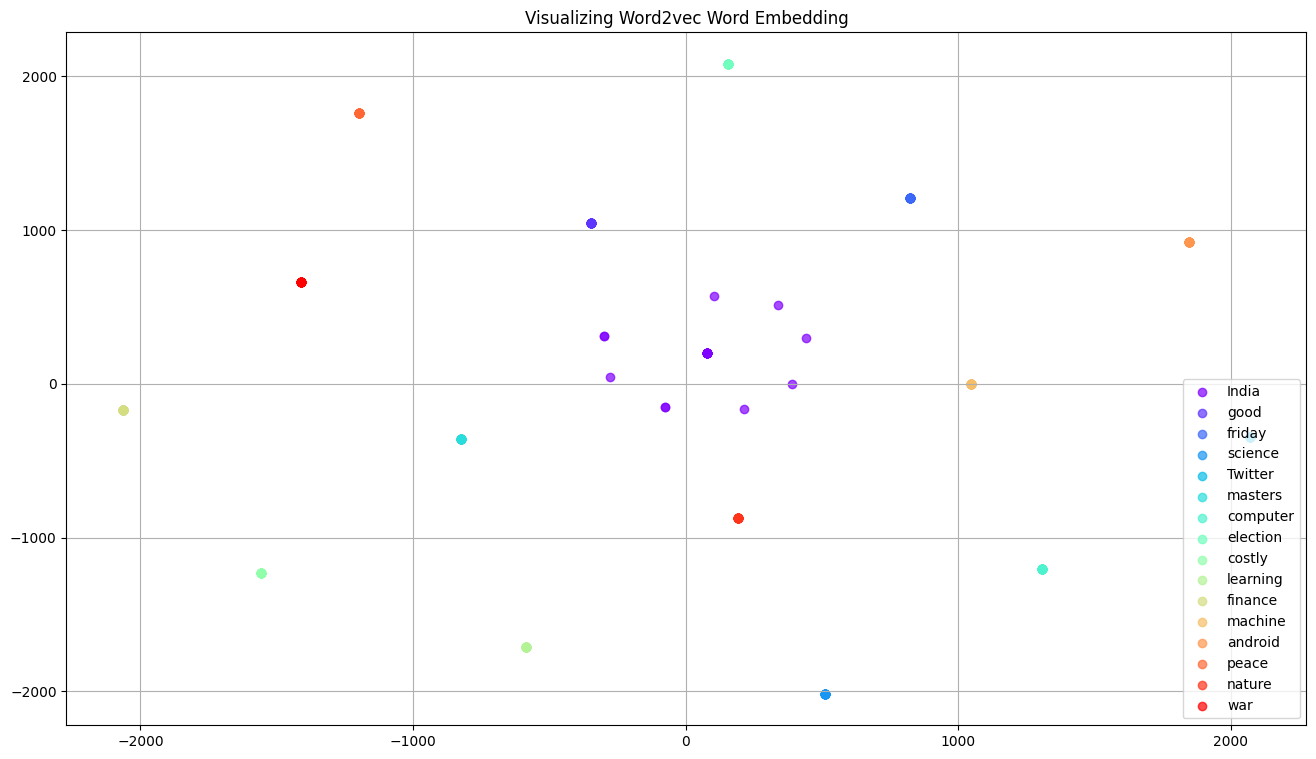

In [ ]:
plot_most_similar_words(keys, tsne_embeddings, words_clusters, "Visualizing Word2vec Word Embedding")

# PREDICTION

## IMPORT LIBRALY

In [7]:
# !pip install emoji
!pip install demoji
!pip install transformers

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


import demoji
# import emoji
import re, string
from transformers import BertTokenizerFast

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# machhine learning model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# evaluation
from sklearn.metrics import classification_report, confusion_matrix

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

## IMPORT DATASET

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df_train = pd.read_csv("/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/Corona_NLP_train.csv",encoding='latin1')
df_test = pd.read_csv("/content/drive/MyDrive/nlp/text_classification_coronavirus_tweets/Corona_NLP_test.csv",encoding='latin1')
df_train

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1      advice Talk to your neighbours family to excha...            Positive  
2      Coronavirus Australia: Woolworths to give elde...            Positive  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                  ...                 ...  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[41157 rows x 6 columns]

## Exploratory Data Analysis

In [11]:
df_train.info(), df_test.info(), df_train.shape, df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+

(None, None, (41157, 6), (3798, 6))

In [12]:
df_train['TweetAt'] = pd.to_datetime(df_train['TweetAt'])
tweets_per_day = df_train['TweetAt'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')
tweets_per_day

<ipython-input-12-d0541b87ea59>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_train['TweetAt'] = pd.to_datetime(df_train['TweetAt'])


index  counts
0   01-04     630
1   02-04     954
2   03-04     810
3   03-16     656
4   03-17    1977
5   03-18    2742
6   03-19    3215
7   03-20    3448
8   03-21    2653
9   03-22    2114
10  03-23    2062
11  03-24    1480
12  03-25    2979
13  03-26    1277
14  03-27     345
15  03-28      23
16  03-29     125
17  03-30      87
18  03-31     316
19  04-04     767
20  04-13    1428
21  04-14     284
22  05-04    1131
23  06-04    1742
24  07-04    1843
25  08-04    1881
26  09-04    1471
27  10-04    1005
28  11-04     909
29  12-04     803

<ipython-input-13-02cd92b1f0e4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black',ci=False, palette='Blues_r')


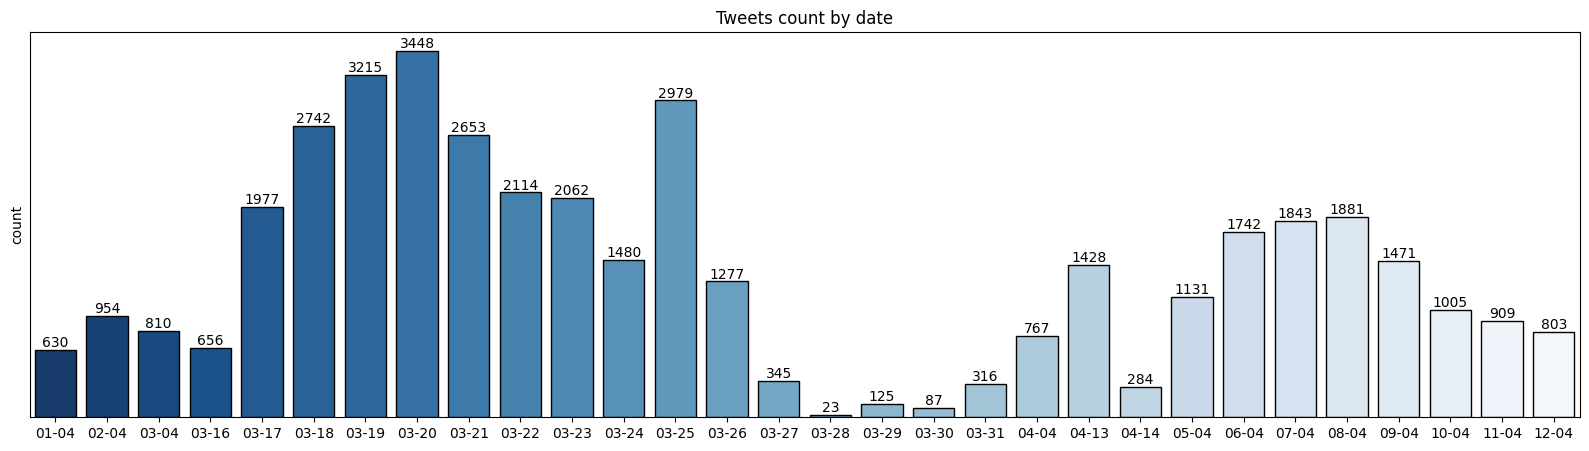

In [13]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black',ci=False, palette='Blues_r')
plt.title('Tweets count by date')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [14]:
tweets_per_country = df_train['Location'].value_counts().loc[lambda x : x > 100].reset_index(name='counts')
tweets_per_country

index  counts
0                    London     540
1             United States     528
2           London, England     520
3              New York, NY     395
4            Washington, DC     373
5            United Kingdom     337
6           Los Angeles, CA     281
7                     India     268
8                        UK     232
9                 Australia     225
10                      USA     223
11                   Canada     191
12  England, United Kingdom     191
13         Toronto, Ontario     160
14                   Global     159
15              Chicago, IL     155
16          California, USA     153
17        San Francisco, CA     152
18               Boston, MA     150
19            New York, USA     140
20         New Delhi, India     138
21              Atlanta, GA     126
22                 New York     126
23            Mumbai, India     109
24                Worldwide     101

<ipython-input-15-8598a10c71b2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black',ci=False, palette='Spectral')


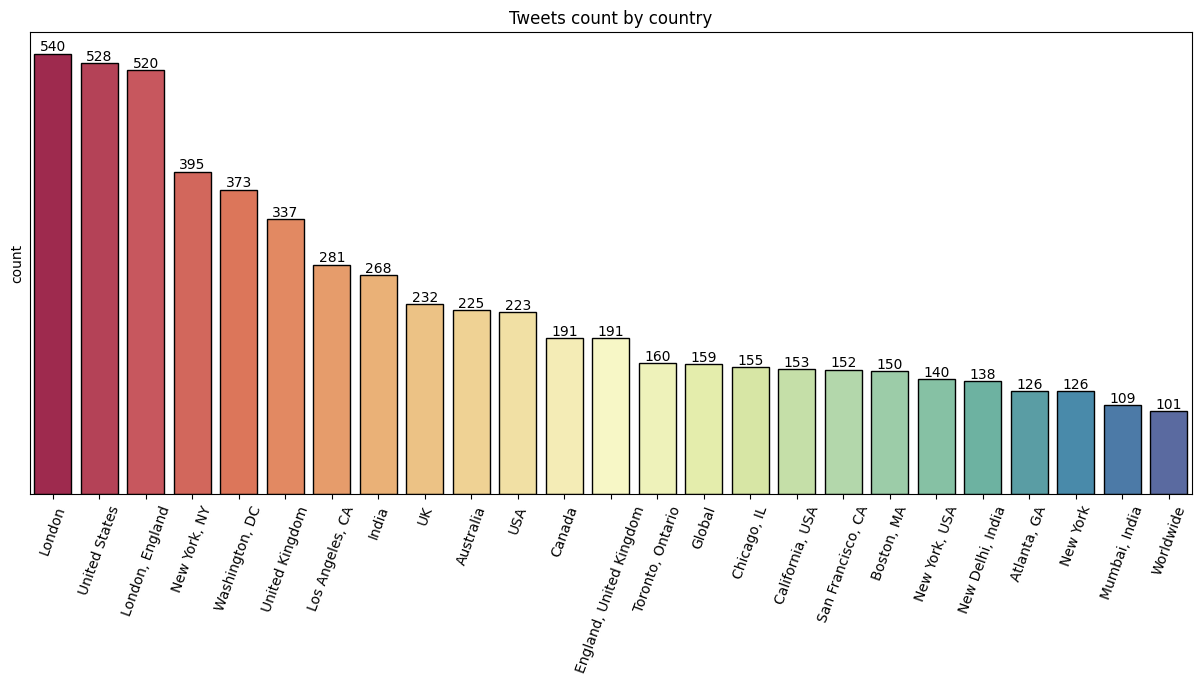

In [15]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black',ci=False, palette='Spectral')
plt.title('Tweets count by country')
plt.xticks(rotation=70)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

## Clean Data

In [16]:
df_train = df_train[['OriginalTweet','Sentiment']]
df_test = df_test[['OriginalTweet','Sentiment']]

In [17]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
def strip_emoji(text):
    return demoji.replace(text, '') #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [18]:
texts_new = []
for t in df_train['OriginalTweet']:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [19]:
texts_new_test = []
for t in df_test['OriginalTweet']:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [20]:
df_train['text_clean'] = texts_new
df_test['text_clean'] = texts_new_test

<ipython-input-20-a7aa85557fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text_clean'] = texts_new


In [21]:
df_train['text_clean'].head()

0                                              and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: text_clean, dtype: object

In [22]:
df_test['text_clean'].head()

0    trending new yorkers encounter empty supermark...
1    when i couldnt find hand sanitizer at fred mey...
2    find out how you can protect yourself and love...
3    panic buying hits newyork city as anxious shop...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: text_clean, dtype: object

In [23]:
text_len = []
for text in df_train['text_clean']:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
df_train['text_len'] = text_len
df_train

<ipython-input-23-222f93f3c484>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text_len'] = text_len


OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia: Woolworths to give elde...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me, ready to go at supermarket during the #COV...  Extremely Negative   
...                                                  ...                 ...   
41152  Airline pilots offering to stock supermarket s...             Neutral   
41153  Response to complaint not provided citing COVI...  Extremely Negative   
41154  You know itÂs getting tough when @KameronWild...            Positive   
41155  Is it wrong that the smell of hand sanitizer i...             Neutral   
41156  @TartiiCat Well new/used Rift S are going for ...            Negative   

                                              text_clean  text_len  
0                                                and and         2  
1      advice talk to your neighbours family to excha...        38  
2      coronavirus australia woolworths to give elder...        13  
3      my food stock is not the only one which is emp...        41  
4      me ready to go at supermarket during the covid...        39  
...                                                  ...       ...  
41152  airline pilots offering to stock supermarket s...        11  
41153  response to complaint not provided citing covi...        22  
41154  you know its getting tough when is rationing t...        16  
41155  is it wrong that the smell of hand sanitizer i...        18  
41156  well newused rift s are going for 70000 on ama...        44  

[41157 rows x 4 columns]

In [24]:
text_len_test = []
for text in df_test.text_clean:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)
df_test['text_len'] = text_len_test
df_test

OriginalTweet           Sentiment  \
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1     When I couldn't find hand sanitizer at Fred Me...            Positive   
2     Find out how you can protect yourself and love...  Extremely Positive   
3     #Panic buying hits #NewYork City as anxious sh...            Negative   
4     #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   
...                                                 ...                 ...   
3793  Meanwhile In A Supermarket in Israel -- People...            Positive   
3794  Did you panic buy a lot of non-perishable item...            Negative   
3795  Asst Prof of Economics @cconces was on @NBCPhi...             Neutral   
3796  Gov need to do somethings instead of biar je r...  Extremely Negative   
3797  I and @ForestandPaper members are committed to...  Extremely Positive   

                                             text_clean  text_len  
0     trending new yorkers encounter empty supermark...        21  
1     when i couldnt find hand sanitizer at fred mey...        29  
2     find out how you can protect yourself and love...        12  
3     panic buying hits newyork city as anxious shop...        35  
4     toiletpaper dunnypaper coronavirus coronavirus...        25  
...                                                 ...       ...  
3793  meanwhile in a supermarket in israel people da...        15  
3794  did you panic buy a lot of nonperishable items...        33  
3795  asst prof of economics was on talking about he...        23  
3796  gov need to do somethings instead of biar je r...        28  
3797  i and members are committed to the safety of o...        30  

[3798 rows x 4 columns]

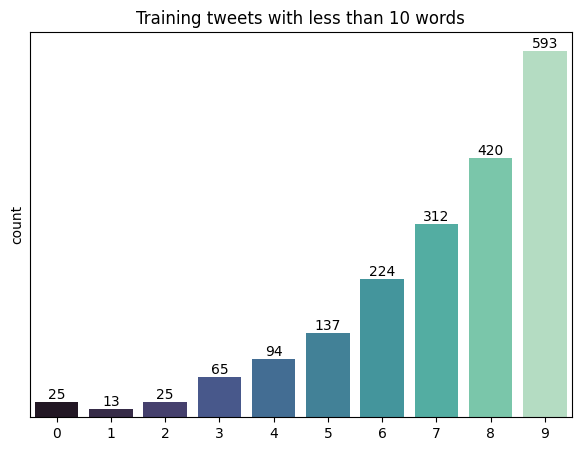

In [25]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df_train[df_train['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

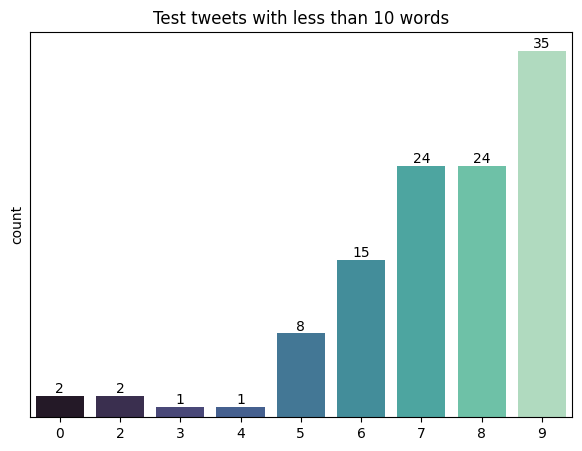

In [26]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df_test[df_test['text_len']<10], palette='mako')
plt.title('Test tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [27]:
df_train.shape, df_test.shape

((41157, 4), (3798, 4))

In [28]:
df_train = df_train[df_train['text_len'] > 4]
df_test = df_test[df_test['text_len'] > 4]
df_train.shape, df_test.shape

((40935, 4), (3792, 4))

### use bert for find not english word and delete not english word in train

In [29]:
#  it does not make a difference between lower case and upper case such as English and english.
# bert-base-uncased
# bert-large-uncased

#  it  make a difference between lower case and upper case such as English and english.
# bert-base-cased
# bert-large-cased
tokenizer = BertTokenizerFast.from_pretrained('bert-large-uncased')


In [30]:
token_lens = []

for txt in df_train['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
max_len

100

In [31]:
token_lens = []

for i,txt in enumerate(df_train['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 1622, TEXT: zsah policie proti spekulantm s roukami na mj popud hejtman steckho kraje ve spoluprci s podle krizovho zkona zajistil tm 700 tisrouek od firmy kter je mla dodat na zdravotnkm ale na posledn chvli se snaila navyovat cenu spolutozvladneme
INDEX: 13623, TEXT: hoy aplaudo a mi segunda familia aplaudoanuestrosheroes aquellos con los que he compartido tantas noches de trabajo y tanta alegra s que como siempre dan todo por el bien de su comunidad presidente por ellos tambin cuarentenanacionalya cuidemosalosquecuidan
INDEX: 16548, TEXT: bir mddettir spermarketlerin lojistik hizmeti avusturya ordusu desteiyle yaplyor dn corona tedavisi iin 22 milyon luk bir aratrma gelitirme btesi aklad hkmet geen hafta da 35 milyon luk 2 yardm paketi aklanmt viyanadan haberler bu kadar
INDEX: 36953, TEXT: 11 nisan cumartesi itibariyle bbnin tm hizmetleri sokaa kma serbestisi olanlar iin devam edecek halk ekmek ve hamidiye su 100 retime geti bb tm stanbulun gda ihtiyacna yetecek kapasitededi

In [32]:
df_train['token_lens'] = token_lens

<ipython-input-32-c9871389e0b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['token_lens'] = token_lens


In [33]:
df_train = df_train.sort_values(by='token_lens', ascending=False)
df_train.head(30)

OriginalTweet           Sentiment  \
1638   ZÃ¡sah policie proti spekulant?m s rouÂkami. ...             Neutral   
37156  11 Nisan Cumartesi itibariyle ?BBÂnin tÃ¼m hi...             Neutral   
16632  Bir mÃ¼ddettir sÃ¼permarketlerin lojistik hizm...             Neutral   
13691  Hoy aplaudo a mi segunda familia #AplaudoANues...             Neutral   
27005  Supermercados Econo confirman que un empleado ...             Neutral   
14593  Na, wer war denn da am Werk? Gestern Nachmitta...  Extremely Negative   
28899  Kindly contact Us bamy global merchandise for ...            Positive   
11213  Keine WertgegenstÃ¤nde im Fahrzeug lassen! - D...            Negative   
4844   Impct of #coronavirus i hve sen hw civilizd pp...  Extremely Negative   
18913  #CroozefmNews \r\r\nPresident Museveni has ord...  Extremely Negative   
30206  #LDA City Lahore Residential Files Prices Upda...             Neutral   
26678  Eine wahre #CoronaGeschichte:\r\r\n\r\r\nWenn ...             Neutral   
12389  Okay, so I just checked the drug prices for #P...            Positive   
1697   I work at a grocery store.\r\r\nWe wont get an...            Positive   
8730   ?Bitte anschauen! (1/2)\r\r\n\r\r\nEmotionaler...            Negative   
14582  hiked prices in the face of the Covid-19 crise...            Negative   
36305  Sterile disposable anti bacterial wet wipes an...            Negative   
36306  For sell Sterile disposable anti bacterial wet...            Negative   
9238   Hi @Zomato I felt hungry loggd in ur app tryd ...  Extremely Positive   
40778  #Covid_19 2days Stay-at-home activities\r\r\nU...             Neutral   
40330  Grap some for your family and keep in safe, #h...            Positive   
34288  $BRZL Scepter Holdings, Inc., Developing Hand ...            Positive   
36545  Global Tenders / RFP For Disinfectant &amp; Sa...            Positive   
10514  the new play Cannabis sales and prices are sky...            Positive   
28978  PM OF INDIA MR. NARENDREA MODI HAS TAKEN VERY ...            Negative   
31936  Kindly contact Us bamy global merchandise for ...            Positive   
23019  4 arrested in Koboko (northern #Uganda) for hi...            Negative   
28935  hey guys thanks to the covid -19 quarantine th...            Positive   
22164  Wishing you lots of love on the Happy occasion...  Extremely Positive   
16537  Tell dem #ChrisTucker its plain 2c some of yal...  Extremely Positive   

                                              text_clean  text_len  token_lens  
1638   zsah policie proti spekulantm s roukami na mj ...        39         100  
37156  11 nisan cumartesi itibariyle bbnin tm hizmetl...        39          98  
16632  bir mddettir spermarketlerin lojistik hizmeti ...        36          92  
13691  hoy aplaudo a mi segunda familia aplaudoanuest...        38          84  
27005  supermercados econo confirman que un empleado ...        39          80  
14593  na wer war denn da am werk gestern nachmittag ...        37          80  
28899  kindly contact us bamy global merchandise for ...        37          80  
11213  keine wertgegenstnde im fahrzeug lassen diesen...        33          79  
4844   impct of coronavirus i hve sen hw civilizd ppl...        48          79  
18913  croozefmnews president museveni has ordered th...        35          79  
30206  lda city lahore residential files prices updat...        43          78  
26678  eine wahre coronageschichte wenn dir an der su...        29          78  
12389  okay so i just checked the drug prices for pla...        35          77  
1697   i work at a grocery store we wont get any toil...        37          77  
8730   bitte anschauen 12 emotionaler aufruf von geha...        36          77  
14582  hiked prices in the face of the covid19 crises...        47          77  
36305  sterile disposable anti bacterial wet wipes an...        31          76  
36306  for sell sterile disposable anti bacterial wet...        32          75  
9238   hi i felt hungry

In [34]:
df_train = df_train.iloc[12:]
df_train.head()

OriginalTweet Sentiment  \
12389  Okay, so I just checked the drug prices for #P...  Positive   
1697   I work at a grocery store.\r\r\nWe wont get an...  Positive   
8730   ?Bitte anschauen! (1/2)\r\r\n\r\r\nEmotionaler...  Negative   
14582  hiked prices in the face of the Covid-19 crise...  Negative   
36305  Sterile disposable anti bacterial wet wipes an...  Negative   

                                              text_clean  text_len  token_lens  
12389  okay so i just checked the drug prices for pla...        35          77  
1697   i work at a grocery store we wont get any toil...        37          77  
8730   bitte anschauen 12 emotionaler aufruf von geha...        36          77  
14582  hiked prices in the face of the covid19 crises...        47          77  
36305  sterile disposable anti bacterial wet wipes an...        31          76

In [35]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train

OriginalTweet           Sentiment  \
0      #RBI &amp; Govt have no clue what is happening...  Extremely Negative   
1      Everyone is saying thank you to the health wor...            Negative   
2      ...Covid-19 evolves. The problem is that when ...            Negative   
3      How covid is impacting online shopping.\r\r\nh...             Neutral   
4      PLEASE SEE BELOW ??\r\r\n\r\r\nSoccer Master S...  Extremely Positive   
...                                                  ...                 ...   
40918  ?The World we are waking up to: #COVID2019 \r\...            Positive   
40919  Rising Pharmaceuticals Responds to Pandemic by...            Negative   
40920  'A perfect storm': US facing #hunger #crisis a...            Positive   
40921  @petersimeti If you want to help just keep doi...  Extremely Positive   
40922  Italy s outbreak is two weeks ahead of Britain...             Neutral   

                                              text_clean  text_len  token_lens  
0      rbi amp govt have no clue what is happening to...        44          55  
1      everyone is saying thank you to the health wor...        42          53  
2      covid19 evolves the problem is that when an ec...        44          50  
3                 how covid is impacting online shopping         6          10  
4      please see below soccer master store news all ...        39          43  
...                                                  ...       ...         ...  
40918  the world we are waking up to covid2019 us pre...        38          48  
40919  rising pharmaceuticals responds to pandemic by...        17          30  
40920  a perfect storm us facing hunger crisis as dem...        18          27  
40921  if you want to help just keep doing what you a...        31          35  
40922  italy s outbreak is two weeks ahead of britain...        24          26  

[40923 rows x 5 columns]

### use bert for find not english word and delete not english word in test

In [36]:
token_lens_test = []

for txt in df_test['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))

max_len=np.max(token_lens_test)
max_len

96

In [37]:
token_lens_test = []

for i,txt in enumerate(df_test['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 286, TEXT: so hard to decide as much as i want to hodl my 2 ccdcv4 token our place is declared to lock down due to covid19 i will use this to buy some food to stock txnid093bd1db0c0d3a62af15883138a5f57d4cef35ae14e31e602b74489dd2524c7f my b
INDEX: 345, TEXT: informoval jsem zstupce vech obchodnch etzc o aktulnch opatench vldy etzce jsou zsobovny na 95 take nen dvod panikait zsoby potravin fakt nedojdou nen opravdu dvod dnes obsadit a vykoupit supermarkety
INDEX: 2380, TEXT: ahora seguid llorando por el papel higinico que no he comprado porque an tengo seguid creando histeria y preocupacin poniendo fotos de gente en pnico y estanteras vacas que yo seguir yendo a comercios responsables de barrio donde nos cuidan hoy y siempre gracias


In [38]:
df_test['token_lens'] = token_lens_test

<ipython-input-38-822c801c9fe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['token_lens'] = token_lens_test


In [39]:
df_test = df_test.sort_values(by='token_lens', ascending=False)
df_test.head(10)

OriginalTweet           Sentiment  \
286   @Rhett800cc So hard to decide??. As much as I ...            Negative   
2383  Ahora seguid llorando por el papel higiÃ©nico ...            Negative   
345   Informoval jsem zÃ¡stupce vÂech obchodnÃ­ch ?...             Neutral   
1485  DTF-DonÂt Touch Face\r\r\nDWBH-Do Wash Both H...  Extremely Negative   
1209  IÂm in the DC/Maryland/Virginia (DMV) area &a...            Positive   
3505  Stop misusing ur privilege amp grow up Some1 c...            Positive   
1789  For those that are cashlong, patient,calm&amp;...  Extremely Positive   
855   Lidl is total chaos, queues as long as the ais...  Extremely Negative   
2740  COVID-19: Your government will save ITSELF not...            Positive   
2997  Stop #frenzybuying. You don't need most of wha...  Extremely Negative   

                                             text_clean  text_len  token_lens  
286   so hard to decide as much as i want to hodl my...        38          96  
2383  ahora seguid llorando por el papel higinico qu...        44          94  
345   informoval jsem zstupce vech obchodnch etzc o ...        31          86  
1485  dtfdont touch face dwbhdo wash both hands gtfo...        42          77  
1209  im in the dcmarylandvirginia dmv area amphave ...        45          74  
3505  stop misusing ur privilege amp grow up some1 c...        57          73  
1789  for those that are cashlong patientcalmamphave...        44          71  
855   lidl is total chaos queues as long as the aisl...        62          70  
2740  covid19 your government will save itself not y...        43          70  
2997  stop frenzybuying you dont need most of what y...        38          70

In [40]:
df_test = df_test.iloc[5:]
df_test.head(5)

OriginalTweet           Sentiment  \
3505  Stop misusing ur privilege amp grow up Some1 c...            Positive   
1789  For those that are cashlong, patient,calm&amp;...  Extremely Positive   
855   Lidl is total chaos, queues as long as the ais...  Extremely Negative   
2740  COVID-19: Your government will save ITSELF not...            Positive   
2997  Stop #frenzybuying. You don't need most of wha...  Extremely Negative   

                                             text_clean  text_len  token_lens  
3505  stop misusing ur privilege amp grow up some1 c...        57          73  
1789  for those that are cashlong patientcalmamphave...        44          71  
855   lidl is total chaos queues as long as the aisl...        62          70  
2740  covid19 your government will save itself not y...        43          70  
2997  stop frenzybuying you dont need most of what y...        38          70

In [41]:
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

OriginalTweet           Sentiment  \
0     The person in front of me in the supermarket q...            Positive   
1     It is now 7pm. My grocery pick up @Walmart was...  Extremely Positive   
2     RetailÂs COVID-19 response is to scan sanitiz...             Neutral   
3     Have you stocked up to deal with uncertainty o...  Extremely Negative   
4     People queue at the entrance of supermarket in...             Neutral   
...                                                 ...                 ...   
3782  FYI We anticipated more food pantry needs toda...            Positive   
3783  Going to the grocery store was v dystopian lik...            Negative   
3784  Lots of empty shelves at grocery store - but p...  Extremely Positive   
3785  They just closed every school in my County unt...             Neutral   
3786  @CMOMaharashtra Masks and sanitizers being sol...            Positive   

                                             text_clean  text_len  token_lens  
0     the person in front of me in the supermarket q...        22          37  
1     it is now 7pm my grocery pick up was to be bet...        51          62  
2     retails covid19 response is to scan sanitizer ...        11          18  
3     have you stocked up to deal with uncertainty o...        47          50  
4     people queue at the entrance of supermarket in...        12          16  
...                                                 ...       ...         ...  
3782  fyi we anticipated more food pantry needs toda...        30          35  
3783  going to the grocery store was v dystopian lik...        22          31  
3784  lots of empty shelves at grocery store but ple...        25          37  
3785  they just closed every school in my county unt...        37          48  
3786  masks and sanitizers being sold at exorbitant ...        21          44  

[3787 rows x 5 columns]

### Clean Sentiment column analysis

In [42]:
df_train['Sentiment'].value_counts(), df_test['Sentiment'].value_counts()

(Positive              11381
 Negative               9889
 Neutral                7560
 Extremely Positive     6618
 Extremely Negative     5475
 Name: Sentiment, dtype: int64,
 Negative              1038
 Positive               945
 Neutral                614
 Extremely Positive     599
 Extremely Negative     591
 Name: Sentiment, dtype: int64)

In [43]:
df_train['Sentiment'] = df_train['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})
df_test['Sentiment'] = df_test['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

In [44]:
df_train['Sentiment'].value_counts(), df_test['Sentiment'].value_counts()

(2    17999
 0    15364
 1     7560
 Name: Sentiment, dtype: int64,
 0    1629
 2    1544
 1     614
 Name: Sentiment, dtype: int64)

### Class Balancing by RandomOverSampler

In [45]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_train['text_clean']).reshape(-1, 1), np.array(df_train['Sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'Sentiment']);

In [46]:
train_os, train_os['Sentiment'].value_counts()


(                                              text_clean  Sentiment
 0      rbi amp govt have no clue what is happening to...          0
 1      everyone is saying thank you to the health wor...          0
 2      covid19 evolves the problem is that when an ec...          0
 3                 how covid is impacting online shopping          1
 4      please see below soccer master store news all ...          2
 ...                                                  ...        ...
 53992  florida gonna get knocked down by covid19 my l...          1
 53993  michigans food bank network is working to resp...          1
 53994  all the ikea outlets in switzerland are closed...          1
 53995  did you check our 400ml automatic liquid soap ...          1
 53996  holidayfarms in glenhead ny has plenty of toil...          1
 
 [53997 rows x 2 columns],
 0    17999
 1    17999
 2    17999
 Name: Sentiment, dtype: int64)

## Train Test Split

In [47]:
X = train_os['text_clean'].values
y = train_os['Sentiment'].values
X_test = df_test['text_clean'].values
y_test = df_test['Sentiment'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape

((48597,), (48597,), (3787,), (3787,), (5400,), (5400,))

## one hot encoder

In [48]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [49]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [50]:
X_train.shape,X_valid.shape, X_test.shape

((48597,), (5400,), (3787,))

## machine learning model

In [51]:
# CountVectorizer
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

# TF-IDF
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

###  Naive Bayes Classifier

In [52]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le)
nb_pred = nb_clf.predict(X_test_tf)
print(classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.71      0.79      0.75      1629
     Neutral       0.59      0.45      0.51       614
    Positive       0.73      0.72      0.73      1544

    accuracy                           0.70      3787
   macro avg       0.68      0.65      0.66      3787
weighted avg       0.70      0.70      0.70      3787



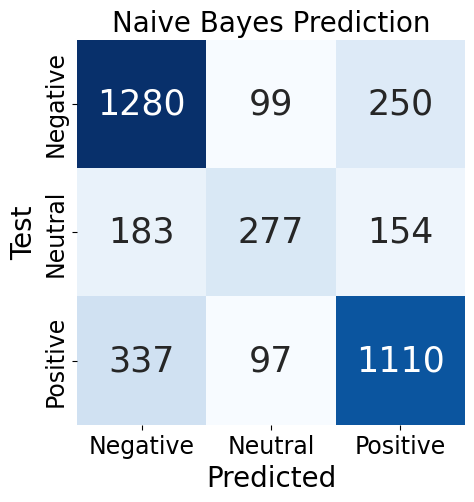

In [54]:
# print(classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

fig, ax =plt.subplots(figsize=(5,5))
labels=['Negative', 'Neutral', 'Positive']
ax=sns.heatmap(confusion_matrix(y_test_le, nb_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
plt.title("Naive Bayes Prediction", fontsize=20)
ax.xaxis.set_ticklabels(labels, fontsize=17)
ax.yaxis.set_ticklabels(labels, fontsize=17)
ax.set_ylabel('Test', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

In [59]:
print('accuracy_score:',accuracy_score(y_test_le, nb_pred), 'percent')
print('f1_score_micro:',f1_score(y_test_le, nb_pred,average='micro'), 'percent')
print('f1_score_macro:',f1_score(y_test_le, nb_pred,average='macro'), 'percent')


accuracy_score: 0.7042513863216266 percent
f1_score_micro: 0.7042513863216266 percent
f1_score_macro: 0.6607325471377375 percent


## BERT

In [60]:
# custom tokenizer function and call the encode_plus method of the BERT tokenizer.
def tokenize(data,max_len=128) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [61]:
train_input_ids, train_attention_masks = tokenize(X_train, 128)
val_input_ids, val_attention_masks = tokenize(X_valid, 128)
test_input_ids, test_attention_masks = tokenize(X_test, 128)

In [62]:
train_input_ids

array([[ 101, 2026, 5448, ...,    0,    0,    0],
       [ 101, 2154, 2539, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 2017, 2064, ...,    0,    0,    0],
       [ 101, 3810, 8413, ...,    0,    0,    0],
       [ 101, 2317, 2160, ...,    0,    0,    0]])

In [63]:
train_attention_masks

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [64]:
X_train

array(['my opinion unless you are at a grocery store because youre running out of food keep your children at home buying tvs video games or video syatems are not a necessity so dont be shitty parents and bring your kids out stay the fuck at home covid2019 covididiots',
       'day 19 we have acquired homemade masks we can now venture to the grocery storeoh waitwe never go there anyways were always safe at home coronavirus facemasks',
       'this is very good news for nhs staff an are going to provide allotted shopping times for workers during the fight against coronavirus',
       ...,
       'you can use this hand sanitizer without touching it definitely useful hack in this pandemic covid19 socialdistancing coronavirus diy robotics iot datascience cc',
       'turning corners at a supermarket like im at a haunted house via coronavirus socialdistance groceryshopping safetyfirst covidmemes staysafe',
       'white house warns americans to avoid the supermarket as covid19 hits peak'],
 

In [65]:
val_input_ids

array([[  101,  4404, 13025, ...,     0,     0,     0],
       [  101,  4365,  2339, ...,     0,     0,     0],
       [  101,  2270,  9720, ...,     0,     0,     0],
       ...,
       [  101,  2069,  2183, ...,     0,     0,     0],
       [  101,  3806,  7597, ...,     0,     0,     0],
       [  101, 11689,  2138, ...,     0,     0,     0]])

In [66]:
val_attention_masks

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [67]:
X_valid

array(['massachusetts grocerysupermarket workers are now eligible for free covid19 testing no symptoms required for testing when can we expect this to happen in michigan time is everything right now we need your support ht',
       'damn why lower the gas prices when we cant go nowhere im out g covid19 america comedy ponder maryland',
       'public urged to do online shopping to curb spread of covid 19',
       ...,
       'only going to the grocery store once every two weeks is going to be tough covid19 coronavirus',
       'gas prices well below 2 a gallon across sc amid covid19 quarantine',
       'thread because i m angry an at the old white man who tried shaming me out of a grocery store and then hit me with a cart throughout the covid 19 crisis i have taken three days off from work where i m an americorps member doing case management'],
      dtype=object)

In [68]:
train_input_ids.shape, train_attention_masks.shape, X_train.shape, val_input_ids.shape, val_attention_masks.shape, X_valid.shape, test_input_ids.shape, test_attention_masks.shape, X_test.shape

((48597, 128),
 (48597, 128),
 (48597,),
 (5400, 128),
 (5400, 128),
 (5400,),
 (3787, 128),
 (3787, 128),
 (3787,))

In [69]:
#  it does not make a difference between lower case and upper case such as English and english.
# bert-base-uncased
# bert-large-uncased

#  it  make a difference between lower case and upper case such as English and english.
# bert-base-cased
# bert-large-cased
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [70]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
loss = tf.keras.losses.CategoricalCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy()


input_ids = tf.keras.Input(shape=(128,),dtype='int32')

attention_masks = tf.keras.Input(shape=(128,),dtype='int32')

embeddings = bert_model([input_ids,attention_masks])[1]

output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

model.compile(opt, loss=loss, metrics=accuracy)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [71]:
history_bert = model.fit(
    [train_input_ids,train_attention_masks],
    y_train,
    validation_data=([val_input_ids,val_attention_masks], y_valid),
    epochs=4, batch_size=32)

Epoch 1/4
1519/1519 [==============================] - 490s 309ms/step - loss: 0.5924 - categorical_accuracy: 0.7602 - val_loss: 0.3508 - val_categorical_accuracy: 0.8739
Epoch 2/4
1519/1519 [==============================] - 441s 290ms/step - loss: 0.3041 - categorical_accuracy: 0.8905 - val_loss: 0.2617 - val_categorical_accuracy: 0.9061
Epoch 3/4
1519/1519 [==============================] - 442s 291ms/step - loss: 0.2016 - categorical_accuracy: 0.9301 - val_loss: 0.2256 - val_categorical_accuracy: 0.9211
Epoch 4/4
1519/1519 [==============================] - 442s 291ms/step - loss: 0.1397 - categorical_accuracy: 0.9527 - val_loss: 0.2186 - val_categorical_accuracy: 0.9350


In [72]:
result_bert = model.predict([test_input_ids,test_attention_masks])
result_bert

119/119 [==============================] - 17s 110ms/step


array([[6.6383509e-04, 7.6276520e-03, 9.9170846e-01],
       [5.4667552e-04, 1.2268521e-03, 9.9822646e-01],
       [3.4087218e-04, 9.9926800e-01, 3.9103895e-04],
       ...,
       [4.9544108e-04, 9.9637499e-04, 9.9850816e-01],
       [1.3152441e-03, 9.9810755e-01, 5.7713938e-04],
       [3.9627537e-04, 1.3270568e-03, 9.9827671e-01]], dtype=float32)

In [73]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

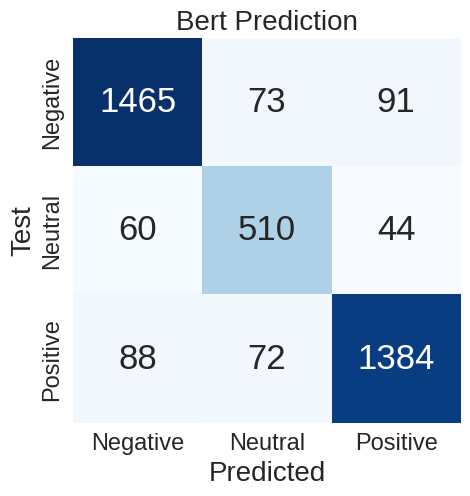

In [86]:
fig, ax =plt.subplots(figsize=(5,5))
labels=['Negative', 'Neutral', 'Positive']
ax=sns.heatmap(confusion_matrix(y_test.argmax(1), y_pred_bert.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
plt.title("Bert Prediction", fontsize=20)
ax.xaxis.set_ticklabels(labels, fontsize=17)
ax.yaxis.set_ticklabels(labels, fontsize=17)
ax.set_ylabel('Test', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

In [88]:
print('\tClassification Report for RoBERTa:\n\n',classification_report(y_test.argmax(1),y_pred_bert.argmax(1), target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.91      0.90      0.90      1629
     Neutral       0.78      0.83      0.80       614
    Positive       0.91      0.90      0.90      1544

    accuracy                           0.89      3787
   macro avg       0.87      0.88      0.87      3787
weighted avg       0.89      0.89      0.89      3787



In [77]:
print('accuracy_score:',accuracy_score(y_test.argmax(1), y_pred_bert.argmax(1)), 'percent')
print('f1_score_micro:',f1_score(y_test.argmax(1), y_pred_bert.argmax(1),average='micro'), 'percent')
print('f1_score_macro:',f1_score(y_test.argmax(1), y_pred_bert.argmax(1),average='macro'), 'percent')

accuracy_score: 0.8869817797729073 percent
f1_score_micro: 0.8869817797729073 percent
f1_score_macro: 0.8704116029010223 percent


## ROBERTA

In [78]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

In [79]:
token_lens = []

for txt in X_train:
    tokens = tokenizer_roberta.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
max_length=np.max(token_lens)
max_length

89

In [80]:
def tokenize_roberta(data,max_len=128) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [81]:
train_input_ids, train_attention_masks = tokenize_roberta(X_train, 128)
val_input_ids, val_attention_masks = tokenize_roberta(X_valid, 128)
test_input_ids, test_attention_masks = tokenize_roberta(X_test, 128)

In [82]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [84]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
loss = tf.keras.losses.CategoricalCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy()

input_ids = tf.keras.Input(shape=(128,),dtype='int32')
attention_masks = tf.keras.Input(shape=(128,),dtype='int32')
output = roberta_model([input_ids,attention_masks])
output = output[1]
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(output)
model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
model.compile(opt, loss=loss, metrics=accuracy)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_3[0][0]',                
 el)                            thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [89]:
history_2 = model.fit([
    train_input_ids,train_attention_masks],
    y_train,
    validation_data=([val_input_ids,val_attention_masks],
    y_valid), epochs=4, batch_size=30)

Epoch 1/4
1620/1620 [==============================] - 450s 278ms/step - loss: 0.4825 - categorical_accuracy: 0.8201 - val_loss: 0.3578 - val_categorical_accuracy: 0.8748
Epoch 2/4
1620/1620 [==============================] - 449s 277ms/step - loss: 0.3224 - categorical_accuracy: 0.8851 - val_loss: 0.2989 - val_categorical_accuracy: 0.8926
Epoch 3/4
1620/1620 [==============================] - 446s 275ms/step - loss: 0.2469 - categorical_accuracy: 0.9131 - val_loss: 0.2687 - val_categorical_accuracy: 0.9059
Epoch 4/4
1620/1620 [==============================] - 446s 275ms/step - loss: 0.1907 - categorical_accuracy: 0.9335 - val_loss: 0.2349 - val_categorical_accuracy: 0.9233


In [90]:
result_roberta = model.predict([test_input_ids,test_attention_masks])
result_roberta

119/119 [==============================] - 16s 108ms/step


array([[1.6232036e-04, 4.3030805e-03, 9.9553454e-01],
       [2.3416118e-04, 2.7687824e-04, 9.9948895e-01],
       [3.8625250e-04, 9.8587579e-01, 1.3737884e-02],
       ...,
       [6.0504104e-04, 2.3269118e-03, 9.9706811e-01],
       [1.1186862e-03, 9.8624390e-01, 1.2637448e-02],
       [1.3111245e-03, 2.0545220e-02, 9.7814369e-01]], dtype=float32)

In [91]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

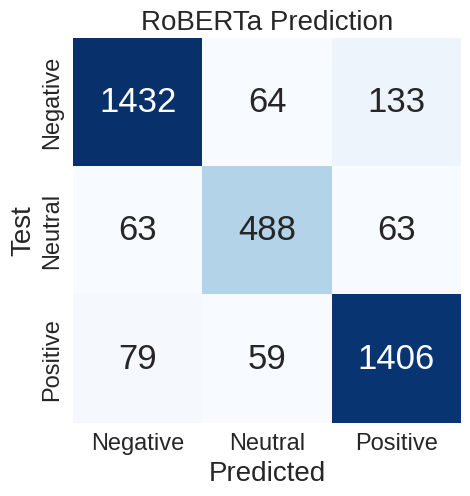

In [92]:
fig, ax =plt.subplots(figsize=(5,5))
labels=['Negative', 'Neutral', 'Positive']
ax=sns.heatmap(confusion_matrix(y_test.argmax(1), y_pred_roberta.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
plt.title("RoBERTa Prediction", fontsize=20)
ax.xaxis.set_ticklabels(labels, fontsize=17)
ax.yaxis.set_ticklabels(labels, fontsize=17)
ax.set_ylabel('Test', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

In [93]:
print('\tClassification Report for RoBERTa:\n\n',classification_report(y_test.argmax(1),y_pred_roberta.argmax(1), target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      1629
     Neutral       0.80      0.79      0.80       614
    Positive       0.88      0.91      0.89      1544

    accuracy                           0.88      3787
   macro avg       0.86      0.86      0.86      3787
weighted avg       0.88      0.88      0.88      3787



In [94]:
print('accuracy_score:',accuracy_score(y_test.argmax(1), y_pred_roberta.argmax(1)), 'percent')
print('f1_score_micro:',f1_score(y_test.argmax(1), y_pred_roberta.argmax(1),average='micro'), 'percent')
print('f1_score_macro:',f1_score(y_test.argmax(1), y_pred_roberta.argmax(1),average='macro'), 'percent')

accuracy_score: 0.8782677581198838 percent
f1_score_micro: 0.8782677581198838 percent
f1_score_macro: 0.8615766188499544 percent
